# Оптимизация молочного хозяйства

**Описание проекта**

К нам обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».

Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих коровок!

Поэтому он просит нас разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах. Нам нужно создать две прогнозные модели для отбора бурёнок в поголовье:
1. Первая будет прогнозировать возможный удой коровы (целевой признак Удой);
2. Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).

С помощью модели нужно отобрать коров по двум критериям:
* средний удой за год — не менее 6000 килограммов;
* молоко должно быть вкусным.

**Описание данных**

Файл ferma_main.csv содержит данные о стаде фермера на текущий момент.

**Описание таблицы:**

***Характеристики коровы:***
* **id** — уникальный идентификатор коровы.
* **Порода** — порода коровы.
* **Возраст** — возраст коровы, бинарный признак (менее_2_лет, более_2_лет). 
* **порода папы_быка** — порода папы коровы.
***Характеристики корма:***
* **ЭКЕ** (Энергетическая кормовая единица) — показатель питательности корма коровы.
* **Сырой протеин, г** — содержание сырого протеина в корме (в граммах).
* **СПО** (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.
***Характеристика пастбища:***
* **Тип пастбища** — ландшафт лугов, на которых паслась корова.
***Характеристики молока:***
* **Жирность,%** — содержание жиров в молоке (в процентах).
* **Белок,%** — содержание белков в молоке (в процентах).
* **Вкус молока** — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно). 
* **Удой, кг** — масса молока, которую корова даёт в год (в килограммах)

Такое разделение поможет нам понять, как взаимосвязаны признаки в датасете.

Файл ferma_dad.csv хранит имя папы каждой коровы в стаде фермера. 

**Описание таблицы:**

* **id** — уникальный идентификатор коровы.
* **Имя Папы** — имя папы коровы.

Файл cow_buy.csv — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. 

**Описание таблицы:**

* **Порода** — порода коровы.
* **Тип пастбища** — ландшафт лугов, на которых паслась корова.
* **порода папы_быка** — порода папы коровы.
* **Имя_папы** — имя папы коровы.
* **Текущая_жирность,%** — содержание жиров в молоке (в процентах).
* **Текущий_уровень_белок,%** — содержание белков в молоке (в процентах).
* **Возраст** — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

Данные в файлах ferma_main.csv и cow_buy.csv похожи, но у датасета cow_buy.csv несколько особенностей.
* Содержание белков и жиров в молоке указано на момент продажи — когда «ЭкоФерма» давала коровам свой корм.
* Параметры корма ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение) отсутствуют. Технологи заказчика пересмотрели подход к кормлению: для новых коров планируется увеличить значения каждого из этих параметров на 5%.
* Кроме того, отсутствуют признаки Удой, кг и Вкус молока. Это целевые признаки, именно их предстоит предсказать!

<h1>План работы<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Считаем-CSV-файлы-в-датафреймы-и-изучим-их" data-toc-modified-id="Считаем-CSV-файлы-в-датафреймы-и-изучим-их-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Считаем CSV-файлы в датафреймы и изучим их</a></span></li><li><span><a href="#Переименуем-столбцы" data-toc-modified-id="Переименуем-столбцы-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Переименуем столбцы</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Проверим-данные-на-наличие-пропусков-и-дубликатов-и-обработаем-их" data-toc-modified-id="Проверим-данные-на-наличие-пропусков-и-дубликатов-и-обработаем-их-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Проверим данные на наличие пропусков и дубликатов и обработаем их</a></span></li><li><span><a href="#Проверим-данные-на-наличие-неявных-дубликатов-и-обработаем-их" data-toc-modified-id="Проверим-данные-на-наличие-неявных-дубликатов-и-обработаем-их-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Проверим данные на наличие неявных дубликатов и обработаем их</a></span></li><li><span><a href="#Преобразуем-типы-данных" data-toc-modified-id="Преобразуем-типы-данных-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Преобразуем типы данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Проведём-статистический-анализ-всех-признаков" data-toc-modified-id="Проведём-статистический-анализ-всех-признаков-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Проведём статистический анализ всех признаков</a></span></li><li><span><a href="#Построим-графики-для-каждого-признака" data-toc-modified-id="Построим-графики-для-каждого-признака-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Построим графики для каждого признака</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Корреляционный-анализ" data-toc-modified-id="Корреляционный-анализ-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Корреляционный анализ</a></span><ul class="toc-item"><li><span><a href="#Изучим-взаимосвязь-между-признаками" data-toc-modified-id="Изучим-взаимосвязь-между-признаками-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Изучим взаимосвязь между признаками</a></span></li><li><span><a href="#Построим-диаграммы-рассеяния-для-признака-Удой,-кг" data-toc-modified-id="Построим-диаграммы-рассеяния-для-признака-Удой,-кг-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Построим диаграммы рассеяния для признака Удой, кг</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Обучение-модели-линейной-регрессии" data-toc-modified-id="Обучение-модели-линейной-регрессии-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Обучение модели линейной регрессии</a></span><ul class="toc-item"><li><span><a href="#Подготовим-данные-датасета-ferma_main-и-обучим-на-них-первую-модель-LinearRegression." data-toc-modified-id="Подготовим-данные-датасета-ferma_main-и-обучим-на-них-первую-модель-LinearRegression.-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Подготовим данные датасета <code>ferma_main</code> и обучим на них первую модель <code>LinearRegression</code>.</a></span><ul class="toc-item"><li><span><a href="#Отберём-признаки,-которые-подходят-для-модели-линейной-регрессии" data-toc-modified-id="Отберём-признаки,-которые-подходят-для-модели-линейной-регрессии-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Отберём признаки, которые подходят для модели линейной регрессии</a></span></li><li><span><a href="#Обучим-модель-и-оценим-её-качество" data-toc-modified-id="Обучим-модель-и-оценим-её-качество-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Обучим модель и оценим её качество</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.1.3"><span class="toc-item-num">5.1.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Подготовим-данные-с-учётом-связи-входных-признаков-с-целевым-и-обучим-на-них-вторую-модель-LinearRegression" data-toc-modified-id="Подготовим-данные-с-учётом-связи-входных-признаков-с-целевым-и-обучим-на-них-вторую-модель-LinearRegression-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Подготовим данные с учётом связи входных признаков с целевым и обучим на них вторую модель <code>LinearRegression</code></a></span><ul class="toc-item"><li><span><a href="#Отберём-признаки,-которые-подходят-для-модели-линейной-регрессии" data-toc-modified-id="Отберём-признаки,-которые-подходят-для-модели-линейной-регрессии-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Отберём признаки, которые подходят для модели линейной регрессии</a></span></li><li><span><a href="#Обучим-модель-и-оценим-её-качество" data-toc-modified-id="Обучим-модель-и-оценим-её-качество-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Обучим модель и оценим её качество</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.2.3"><span class="toc-item-num">5.2.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Добавим-в-данные-новый-признак-и-обучим-на-них-третью-модель-LinearRegression" data-toc-modified-id="Добавим-в-данные-новый-признак-и-обучим-на-них-третью-модель-LinearRegression-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Добавим в данные новый признак и обучим на них третью модель <code>LinearRegression</code></a></span><ul class="toc-item"><li><span><a href="#Добавим-признак-Имя-Папы-sire_name-из-датафрейма-ferma_dad,-соединив-его-с-остальными-данными-ferma_main-по-ключу" data-toc-modified-id="Добавим-признак-Имя-Папы-sire_name-из-датафрейма-ferma_dad,-соединив-его-с-остальными-данными-ferma_main-по-ключу-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>Добавим признак Имя Папы <code>sire_name</code> из датафрейма <code>ferma_dad</code>, соединив его с остальными данными <code>ferma_main</code> по ключу</a></span></li><li><span><a href="#Обучим-модель-и-оценим-её-качество" data-toc-modified-id="Обучим-модель-и-оценим-её-качество-5.3.2"><span class="toc-item-num">5.3.2&nbsp;&nbsp;</span>Обучим модель и оценим её качество</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.3.3"><span class="toc-item-num">5.3.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Сравним-качество-трёх-моделей-линейной-регрессии,-сопоставим-их-R²-и-остатки" data-toc-modified-id="Сравним-качество-трёх-моделей-линейной-регрессии,-сопоставим-их-R²-и-остатки-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Сравним качество трёх моделей линейной регрессии, сопоставим их R² и остатки</a></span></li><li><span><a href="#Оценим-качество-каждой-модели-по-трём-метрикам:-MSE,-MAE,-RMSE" data-toc-modified-id="Оценим-качество-каждой-модели-по-трём-метрикам:-MSE,-MAE,-RMSE-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Оценим качество каждой модели по трём метрикам: MSE, MAE, RMSE</a></span><ul class="toc-item"><li><span><a href="#Выберем-лучшую-модель" data-toc-modified-id="Выберем-лучшую-модель-5.5.1"><span class="toc-item-num">5.5.1&nbsp;&nbsp;</span>Выберем лучшую модель</a></span></li><li><span><a href="#Доверительный-интервал-прогноза-лучшей-модели" data-toc-modified-id="Доверительный-интервал-прогноза-лучшей-модели-5.5.2"><span class="toc-item-num">5.5.2&nbsp;&nbsp;</span>Доверительный интервал прогноза лучшей модели</a></span></li></ul></li><li><span><a href="#С-помощью-лучшей-модели-спрогнозируем-удой-коров,-которых-фермер-хочет-купить" data-toc-modified-id="С-помощью-лучшей-модели-спрогнозируем-удой-коров,-которых-фермер-хочет-купить-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>С помощью лучшей модели спрогнозируем удой коров, которых фермер хочет купить</a></span><ul class="toc-item"><li><span><a href="#Добавим-недостающие-признаки-ЭКЕ-(Энергетическая-кормовая-единица),-Сырой-протеин,-г-и-СПО-(Сахаро-протеиновое-соотношение)" data-toc-modified-id="Добавим-недостающие-признаки-ЭКЕ-(Энергетическая-кормовая-единица),-Сырой-протеин,-г-и-СПО-(Сахаро-протеиновое-соотношение)-5.6.1"><span class="toc-item-num">5.6.1&nbsp;&nbsp;</span>Добавим недостающие признаки <code>ЭКЕ</code> (Энергетическая кормовая единица), <code>Сырой протеин</code>, г и <code>СПО</code> (Сахаро-протеиновое соотношение)</a></span></li><li><span><a href="#Выполним-подготовку-данных,-аналогичную-той,-которую-делали-для-тренировочной-выборки" data-toc-modified-id="Выполним-подготовку-данных,-аналогичную-той,-которую-делали-для-тренировочной-выборки-5.6.2"><span class="toc-item-num">5.6.2&nbsp;&nbsp;</span>Выполним подготовку данных, аналогичную той, которую делали для тренировочной выборки</a></span></li><li><span><a href="#Получим-прогноз-удоя-коров" data-toc-modified-id="Получим-прогноз-удоя-коров-5.6.3"><span class="toc-item-num">5.6.3&nbsp;&nbsp;</span>Получим прогноз удоя коров</a></span></li></ul></li></ul></li><li><span><a href="#Обучение-модели-логистической-регрессии" data-toc-modified-id="Обучение-модели-логистической-регрессии-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Обучение модели логистической регрессии</a></span><ul class="toc-item"><li><span><a href="#Подготовим-данные-датасета-ferma_main-и-обучим-на-них-модель-LogisticRegression" data-toc-modified-id="Подготовим-данные-датасета-ferma_main-и-обучим-на-них-модель-LogisticRegression-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Подготовим данные датасета <code>ferma_main</code> и обучим на них модель <code>LogisticRegression</code></a></span><ul class="toc-item"><li><span><a href="#Преобразуем-имеющиеся-признаки" data-toc-modified-id="Преобразуем-имеющиеся-признаки-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>Преобразуем имеющиеся признаки</a></span></li><li><span><a href="#Обучим-модель-и-оценим-её-качество" data-toc-modified-id="Обучим-модель-и-оценим-её-качество-6.1.2"><span class="toc-item-num">6.1.2&nbsp;&nbsp;</span>Обучим модель и оценим её качество</a></span></li></ul></li><li><span><a href="#Проанализируем-модель-логистической-регрессии" data-toc-modified-id="Проанализируем-модель-логистической-регрессии-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Проанализируем модель логистической регрессии</a></span><ul class="toc-item"><li><span><a href="#Какая-ошибка-критичнее-всего-при-покупке-коров:-первого-или-второго-рода?" data-toc-modified-id="Какая-ошибка-критичнее-всего-при-покупке-коров:-первого-или-второго-рода?-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Какая ошибка критичнее всего при покупке коров: первого или второго рода?</a></span></li><li><span><a href="#Сведём-критичную-ошибку-к-нулю" data-toc-modified-id="Сведём-критичную-ошибку-к-нулю-6.2.2"><span class="toc-item-num">6.2.2&nbsp;&nbsp;</span>Сведём критичную ошибку к нулю</a></span></li></ul></li><li><span><a href="#С-помощью-обученной-модели-спрогнозируем-вкус-молока-коров,-которых-фермер-хочет-купить" data-toc-modified-id="С-помощью-обученной-модели-спрогнозируем-вкус-молока-коров,-которых-фермер-хочет-купить-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>С помощью обученной модели спрогнозируем вкус молока коров, которых фермер хочет купить</a></span><ul class="toc-item"><li><span><a href="#Выполним-подготовку-данных,-аналогичную-той,-которую-делали-для-тренировочной-выборки." data-toc-modified-id="Выполним-подготовку-данных,-аналогичную-той,-которую-делали-для-тренировочной-выборки.-6.3.1"><span class="toc-item-num">6.3.1&nbsp;&nbsp;</span>Выполним подготовку данных, аналогичную той, которую делали для тренировочной выборки.</a></span></li><li><span><a href="#Получим-прогноз-вкуса-молока-коров" data-toc-modified-id="Получим-прогноз-вкуса-молока-коров-6.3.2"><span class="toc-item-num">6.3.2&nbsp;&nbsp;</span>Получим прогноз вкуса молока коров</a></span></li></ul></li></ul></li><li><span><a href="#Итоговые-выводы" data-toc-modified-id="Итоговые-выводы-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Итоговые выводы</a></span><ul class="toc-item"><li><span><a href="#Добавим-прогнозы-вкуса-молока-и-удоя-коров-«ЭкоФермы»-в-датафрейм-с-коровами,-покупку-которых-рассматривает-фермер" data-toc-modified-id="Добавим-прогнозы-вкуса-молока-и-удоя-коров-«ЭкоФермы»-в-датафрейм-с-коровами,-покупку-которых-рассматривает-фермер-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Добавим прогнозы вкуса молока и удоя коров «ЭкоФермы» в датафрейм с коровами, покупку которых рассматривает фермер</a></span></li><li><span><a href="#Отберём-коров,-для-которых-спрогнозирован-удой-более-6000-килограммов-в-год-и-вкусное-молоко" data-toc-modified-id="Отберём-коров,-для-которых-спрогнозирован-удой-более-6000-килограммов-в-год-и-вкусное-молоко-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Отберём коров, для которых спрогнозирован удой более 6000 килограммов в год и вкусное молоко</a></span></li><li><span><a href="#Результаты-работы-моделей-для-фермера" data-toc-modified-id="Результаты-работы-моделей-для-фермера-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Результаты работы моделей для фермера</a></span></li><li><span><a href="#Выводы-о-моделях-линейной-регрессии-и-логистической-регрессии" data-toc-modified-id="Выводы-о-моделях-линейной-регрессии-и-логистической-регрессии-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Выводы о моделях линейной регрессии и логистической регрессии</a></span></li></ul></li></ul></div>

Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import (
    LinearRegression, 
    LogisticRegression
)
from sklearn.preprocessing import (
    OneHotEncoder, 
    StandardScaler
)
from sklearn.metrics import (
    r2_score, 
    mean_squared_error, 
    mean_absolute_error,
    accuracy_score, 
    precision_score, 
    recall_score, 
    confusion_matrix
)
import scipy.stats as st

import warnings
warnings.simplefilter("ignore")

## Загрузка данных

### Считаем CSV-файлы в датафреймы и изучим их

Напишем функцию для просмотра характеристик датафреймов

In [2]:
def info_func(df):
    print('-'*22,'Исходный датафрейм', df.name, '-'*22)
    display(df.head())
    print('')
    print('')
    print('-'*12,'Общая информация о датафрейме', df.name,'-'*12)
    print('')
    print('')
    display(df.info())

Считаем CSV-файл `ferma_main.csv` в датафрейм `ferma_main`:

In [3]:
try:
    ferma_main = pd.read_csv('/datasets/ferma_main.csv', sep=';', decimal=',')
except:
    ferma_main = pd.read_csv(
        'https://xxx/datasets/ferma_main.csv',
        sep=';',
        decimal=','
    )
ferma_main.name = 'ferma_main'

Считаем CSV-файл `ferma_dad.csv` в датафрейм `ferma_dad`:

In [4]:
try:
    ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';')
except:
    ferma_dad = pd.read_csv(
        'https://code.s3.yandex.net/datasets/ferma_dad.csv', 
        sep=';'
    )
ferma_dad.name = 'ferma_dad'

Считаем CSV-файл `cow_buy.csv` в датафрейм `cow_buy`:

In [5]:
try:
    cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep=';', decimal=',')
except:
    cow_buy = pd.read_csv(
        'https://code.s3.yandex.net/datasets/cow_buy.csv',
        sep=';', 
        decimal=','
    )
cow_buy.name = 'cow_buy'

Применим к датафреймам функцию `info_func`

In [6]:
dfs = [ferma_main, ferma_dad, cow_buy]

for df in dfs:
    info_func(df)

---------------------- Исходный датафрейм ferma_main ----------------------


id  Удой, кг  ЭКЕ (Энергетическая кормовая единица)  Сырой протеин, г  \
0   1      5863                                   14.2              1743   
1   2      5529                                   12.8              2138   
2   3      5810                                   14.0              1854   
3   4      5895                                   12.4              2012   
4   5      5302                                   12.8              1675   

   СПО (Сахаро-протеиновое соотношение)           Порода Тип пастбища  \
0                                 0.890   Вис Бик Айдиал    Равнинное   
1                                 0.890   Вис Бик Айдиал    Равнинные   
2                                 0.885  РефлешнСоверинг    Холмистое   
3                                 0.885  РефлешнСоверинг    Холмистое   
4                                 0.885   Вис Бик Айдиал    Равнинные   

  порода папы_быка  Жирность,%  Белок,% Вкус молока      Возраст  
0           Айдиал        3.58    3.076      вкусно  более_2_лет  
1          Соверин        3.54    3.079      вкусно  менее_2_лет  
2          Соверин        3.59    3.074   не вкусно  более_2_лет  
3           Айдиал        3.40    3.075   не вкусно  более_2_лет  
4          Соверин        3.73    3.073      вкусно  менее_2_лет



------------ Общая информация о датафрейме ferma_main ------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вку

None

---------------------- Исходный датафрейм ferma_dad ----------------------


id  Имя Папы
0   1    Буйный
1   2  Соловчик
2   3     Барин
3   4    Буйный
4   5     Барин



------------ Общая информация о датафрейме ferma_dad ------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


None

---------------------- Исходный датафрейм cow_buy ----------------------


Порода Тип пастбища порода папы_быка  Имя_папы  \
0   Вис Бик Айдиал    холмистое           Айдиал  Геркулес   
1   Вис Бик Айдиал    равнинное          Соверин    Буйный   
2  РефлешнСоверинг    равнинное          Соверин     Барин   
3  РефлешнСоверинг    холмистое           Айдиал    Буйный   
4  РефлешнСоверинг    равнинное           Айдиал    Буйный   

   Текущая_жирность,%  Текущий_уровень_белок,%      Возраст  
0                3.58                    3.076  более_2_лет  
1                3.54                    3.081  менее_2_лет  
2                3.59                    3.074  более_2_лет  
3                3.40                    3.061  более_2_лет  
4                3.64                    3.074  более_2_лет



------------ Общая информация о датафрейме cow_buy ------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


None

### Переименуем столбцы

Выведем список столбцов датафрейма `ferma_main`

In [7]:
ferma_main.columns

Index(['id', 'Удой, кг', 'ЭКЕ (Энергетическая кормовая единица)',
       'Сырой протеин, г', 'СПО (Сахаро-протеиновое соотношение)', 'Порода',
       'Тип пастбища', 'порода папы_быка', 'Жирность,%', 'Белок,%',
       'Вкус молока', 'Возраст'],
      dtype='object')

Переименуем столбцы

In [8]:
ferma_main.rename(columns={
    'id': 'id',
    'Удой, кг': 'milk_yield',
    'ЭКЕ (Энергетическая кормовая единица)': 'efu',
    'Сырой протеин, г': 'crude_protein',
    'СПО (Сахаро-протеиновое соотношение)': 'spr',
    'Порода': 'breed',
    'Тип пастбища': 'pasture_type',
    'порода папы_быка': 'sire_breed',
    'Жирность,%': 'fat',
    'Белок,%': 'protein',
    'Вкус молока': 'taste',
    'Возраст': 'age'
}, inplace=True)

In [9]:
ferma_main.columns

Index(['id', 'milk_yield', 'efu', 'crude_protein', 'spr', 'breed',
       'pasture_type', 'sire_breed', 'fat', 'protein', 'taste', 'age'],
      dtype='object')

Выведем список столбцов датафрейма `ferma_dad`

In [10]:
ferma_dad.columns

Index(['id', 'Имя Папы'], dtype='object')

Переименуем столбцы

In [11]:
ferma_dad.rename(columns={
    'Имя Папы': 'sire_name'
}, inplace=True)

In [12]:
ferma_dad.columns

Index(['id', 'sire_name'], dtype='object')

Выведем список столбцов датафрейма `cow_buy.csv`

Переименуем столбцы

In [13]:
cow_buy.rename(columns={
    'Порода': 'breed',
    'Тип пастбища': 'pasture_type',
    'порода папы_быка': 'sire_breed',
    'Имя_папы': 'sire_name',
    'Текущая_жирность,%': 'current_fat',
    'Текущий_уровень_белок,%': 'current_protein',
    'Возраст': 'age'
}, inplace=True)

In [14]:
cow_buy.columns

Index(['breed', 'pasture_type', 'sire_breed', 'sire_name', 'current_fat',
       'current_protein', 'age'],
      dtype='object')

### Вывод

* Датафреймы содержат:
 * `ferma_main` - 634 строки
 * `ferma_dad` -  629 строк
 * `cow_buy` - 20 строк
* В датафрейме `ferma_main` и `cow_buy` преобразовали десятичный разделитель из ',' в '.', чтобы корректно опредилились типы данных в числовых столбцах.
* Вкус молока в датафрейме `ferma_main`  необходимо преобразовать в бинарный тип данных
* Переименовали столбцы в датафреймах, записали их латиницей в "змеином_регистре"

##  Предобработка данных

### Проверим данные на наличие пропусков и дубликатов и обработаем их

Напишем функцию для проверки наличия пропусков и дубликатов в данных

In [15]:
def check_func(df):
    print('-'*10,'Количество пустых значений в датафрейме',df.name,'-'*10)
    print('')
    print('')
    display(df.isna().sum())
    print('-'*10,'Количество явных дубликатов в датафрейме',df.name,'-'*10)
    display(df.duplicated().sum())

Применим функцию к нашим датафреймам

In [16]:
for df in dfs:
    check_func(df)

---------- Количество пустых значений в датафрейме ferma_main ----------




id               0
milk_yield       0
efu              0
crude_protein    0
spr              0
breed            0
pasture_type     0
sire_breed       0
fat              0
protein          0
taste            0
age              0
dtype: int64

---------- Количество явных дубликатов в датафрейме ferma_main ----------


5

---------- Количество пустых значений в датафрейме ferma_dad ----------




id           0
sire_name    0
dtype: int64

---------- Количество явных дубликатов в датафрейме ferma_dad ----------


0

---------- Количество пустых значений в датафрейме cow_buy ----------




breed              0
pasture_type       0
sire_breed         0
sire_name          0
current_fat        0
current_protein    0
age                0
dtype: int64

---------- Количество явных дубликатов в датафрейме cow_buy ----------


4

Удалим явные дубликаты в `ferma_main`

In [17]:
ferma_main = ferma_main.drop_duplicates()

Проверим количество дубликатов вновь

In [19]:
ferma_main.duplicated().sum()

0

### Проверим данные на наличие неявных дубликатов и обработаем их

Напишем функцию для вывода уникальных значений из столбцов типа `object`

In [21]:
def df_unique(df):
    # выбираем столбцы типа 'object'
    object_columns = df.select_dtypes(include=['object'])

    # Выводим список уникальных значений для этих столбцов
    for column in object_columns.columns:
        print(f'Столбец {column}:')
        print(object_columns[column].unique())
        print()

Используем нашу функцию для всех датафреймов

In [22]:
for df in dfs:
    print(f'Датафрейм: {df.name}')
    print()
    df_unique(df)

Датафрейм: ferma_main

Столбец breed:
['Вис Бик Айдиал' 'РефлешнСоверинг']

Столбец pasture_type:
['Равнинное' 'Равнинные' 'Холмистое']

Столбец sire_breed:
['Айдиал' 'Соверин' 'Айдиалл']

Столбец taste:
['вкусно' 'не вкусно']

Столбец age:
['более_2_лет' 'менее_2_лет']

Датафрейм: ferma_dad

Столбец sire_name:
['Буйный' 'Соловчик' 'Барин' 'Геркулес']

Датафрейм: cow_buy

Столбец breed:
['Вис Бик Айдиал' 'РефлешнСоверинг']

Столбец pasture_type:
['холмистое' 'равнинное']

Столбец sire_breed:
['Айдиал' 'Соверин']

Столбец sire_name:
['Геркулес' 'Буйный' 'Барин' 'Соловчик']

Столбец age:
['более_2_лет' 'менее_2_лет']



Приведём данные в столбце `pasture_type` датафрейма `ferma_main` к нижнему регистру

In [23]:
ferma_main['pasture_type'] = ferma_main['pasture_type'].str.lower()

Заменим `равнинные` на `равнинное` в столбце `pasture_type` датафрейма `ferma_main`

In [24]:
ferma_main['pasture_type'] = ferma_main['pasture_type'].replace('равнинные', 'равнинное')

In [25]:
ferma_main['pasture_type'].unique()

array(['равнинное', 'холмистое'], dtype=object)

Заменим `Айдиалл` на `Айдиал` в столбце `sire_breed` датафрейма `ferma_main`

In [26]:
ferma_main['sire_breed'] = ferma_main['sire_breed'].replace({'Айдиалл': 'Айдиал'})

In [27]:
ferma_main['sire_breed'].unique()

array(['Айдиал', 'Соверин'], dtype=object)

### Преобразуем типы данных

~~Преобразуем возраст в датафреймах `ferma_main` и `cow_buy` в бинарный тип данных: 1 - более 2 лет, 0 - менее 2 лет~~

In [28]:
# Заменим 'вкусно' на 1 и 'не вкусно' на 0 в столбце 'taste'
#ferma_main['age'] = ferma_main['age'].replace({'более_2_лет': 1, 'менее_2_лет': 0})

In [29]:
#cow_buy['age'] = cow_buy['age'].replace({'более_2_лет': 1, 'менее_2_лет': 0})

Преобразуем вкус молока в датафрейме `ferma_main` в бинарный тип данных: 1 - вкусно, 0 - не вкусно

In [30]:
# Заменим 'вкусно' на 1 и 'не вкусно' на 0 в столбце 'taste'
ferma_main['taste'] = ferma_main['taste'].replace({'вкусно': 1, 'не вкусно': 0})

### Вывод

* Пропущенные значения в датафреймах отсутствуют
* В датафрейме `ferma_main` удалили дубликаты
* В датафрейме `ferma_main` в столбцах `pasture_type` и `sire_breed` удалили неявные дубликаты

## Исследовательский анализ данных

### Проведём статистический анализ всех признаков

Напишем функцию для вывода описательной статистики

In [31]:
def stat_func(df):
    print('-'*12,'Описательная статистика',df.name,'-'*12)
    display(df.describe().T)

Применим функцию к нашим датафреймам

In [32]:
for df in dfs:
    stat_func(df)

------------ Описательная статистика ferma_main ------------


count         mean          std       min       25%       50%  \
id             634.0   317.460568   183.096982     1.000   159.250   317.500   
milk_yield     634.0  6187.025237  1638.401021  5204.000  5751.750  6130.500   
efu            634.0    14.542744     1.301301    10.900    13.500    14.700   
crude_protein  634.0  1922.682965   182.392548  1660.000  1772.250  1880.500   
spr            634.0     0.912855     0.032209     0.840     0.890     0.930   
fat            634.0     3.603943     0.168020     2.990     3.590     3.650   
protein        634.0     3.075666     0.002540     3.069     3.074     3.076   

                    75%        max  
id              475.750    629.000  
milk_yield     6501.000  45616.000  
efu              15.600     16.800  
crude_protein  2058.750   2349.000  
spr               0.940      0.960  
fat               3.720      3.750  
protein           3.077      3.085

------------ Описательная статистика ferma_dad ------------


count   mean        std  min    25%    50%    75%    max
id  629.0  315.0  181.72094  1.0  158.0  315.0  472.0  629.0

------------ Описательная статистика cow_buy ------------


count    mean       std    min    25%    50%    75%    max
current_fat       20.0  3.5775  0.126818  3.340  3.510  3.590  3.650  3.770
current_protein   20.0  3.0695  0.010339  3.046  3.064  3.074  3.076  3.081

У параметра `milk_yield` датафрейма `ferma_main` наблюдается большая разница между максимальным значением и 3-м квартилем. Расчитаем значение 99 квартиля.

In [33]:
q_99 = ferma_main.milk_yield.quantile(0.99)

Найдём значения, которые лежат за пределами 99 квартиля

In [34]:
ferma_main.query('milk_yield > @q_99')

id  milk_yield   efu  crude_protein   spr            breed pasture_type  \
16    17       45616  11.5           1675  0.93   Вис Бик Айдиал    холмистое   
46    47        7173  16.7           2146  0.95  РефлешнСоверинг    холмистое   
70    71        7222  16.8           2157  0.95   Вис Бик Айдиал    холмистое   
135  136        7207  16.6           2343  0.94   Вис Бик Айдиал    холмистое   
294  295        7197  15.6           2241  0.94  РефлешнСоверинг    холмистое   
296  297        7201  15.8           2077  0.94  РефлешнСоверинг    холмистое   
593  594        7174  16.7           2318  0.95  РефлешнСоверинг    холмистое   

    sire_breed   fat  protein  taste          age  
16      Айдиал  3.22    3.076      1  более_2_лет  
46      Айдиал  3.72    3.075      1  более_2_лет  
70      Айдиал  3.70    3.076      1  более_2_лет  
135     Айдиал  3.72    3.078      1  более_2_лет  
294     Айдиал  3.71    3.075      1  более_2_лет  
296     Айдиал  3.71    3.072      1  более_2_лет  
593     Айдиал  3.72    3.074      1  более_2_лет

Среди этих значений мы видим явный выброс - `45616`, удалим эту строчку

In [35]:
ferma_main = ferma_main.query('milk_yield < 45616')

In [36]:
ferma_main.shape

(628, 12)

In [37]:
cow_buy.shape

(20, 7)

In [38]:
ferma_main.describe().T

count         mean         std       min       25%       50%  \
id             628.0   315.474522  181.475367     1.000   158.750   315.500   
milk_yield     628.0  6125.968153  475.857053  5204.000  5749.750  6132.500   
efu            628.0    14.548726    1.301777    10.900    13.500    14.700   
crude_protein  628.0  1923.759554  182.832816  1660.000  1771.750  1888.000   
spr            628.0     0.913089    0.032221     0.840     0.890     0.930   
fat            628.0     3.604268    0.168093     2.990     3.590     3.650   
protein        628.0     3.075670    0.002551     3.069     3.074     3.076   
taste          628.0     0.589172    0.492376     0.000     0.000     1.000   

                    75%       max  
id              472.250   629.000  
milk_yield     6501.000  7222.000  
efu              15.600    16.800  
crude_protein  2062.250  2349.000  
spr               0.940     0.960  
fat               3.720     3.750  
protein           3.077     3.085  
taste             1.000     1.000

### Построим графики для каждого признака

Напишем функцию для построения графиков для количественных и категориальных признаков

In [39]:
def graphs_for_columns(df, n_columns, q_columns):
    num_columns = len(n_columns) + len(q_columns)
    num_rows = (num_columns + 2) // 3

    fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
    fig.suptitle("Гистограммы и Pie диаграммы для указанных столбцов")

    for i, column in enumerate(n_columns):
        row, col_idx = divmod(i, 3)
        ax = axes[row, col_idx]
        sns.histplot(df[column], bins=20, palette='Blues_d', ax=ax)
        ax.set_title(column)
        ax.set_xlabel(column)
        ax.set_ylabel("Частота")
        ax.grid(axis='y')

        # Добавление среднего значения и медианы
        mean = df[column].mean()
        median = df[column].median()
        ax.axvline(mean, color='r', linestyle='--')
        ax.axvline(median, color='g', linestyle='-')
        ax.legend({'Mean': mean, 'Median': median})

    for j, column in enumerate(q_columns):
        row, col_idx = divmod(i + j + 1, 3)
        ax = axes[row, col_idx]
        df[column].value_counts().plot(
            kind='pie',
            autopct='%1.1f%%',
            ax=ax,
            colors=sns.color_palette('Blues_d'))
        ax.set_title(column)
        ax.set_ylabel("")
        ax.set_xlabel("")

    # Удаление пустых подграфиков, если количество столбцов не кратно 3
    for k in range(i + j + 2, num_rows * 3):
        fig.delaxes(axes[k // 3, k % 3])

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

Зададим переменные содержащие количественныи и категориальные данные

In [40]:
num_col_names = ['milk_yield','efu','crude_protein','spr','fat','protein']
cat_col_names = ['breed','pasture_type','sire_breed','taste','age']

Применим нашу функцию к датафрейму `ferma_main`

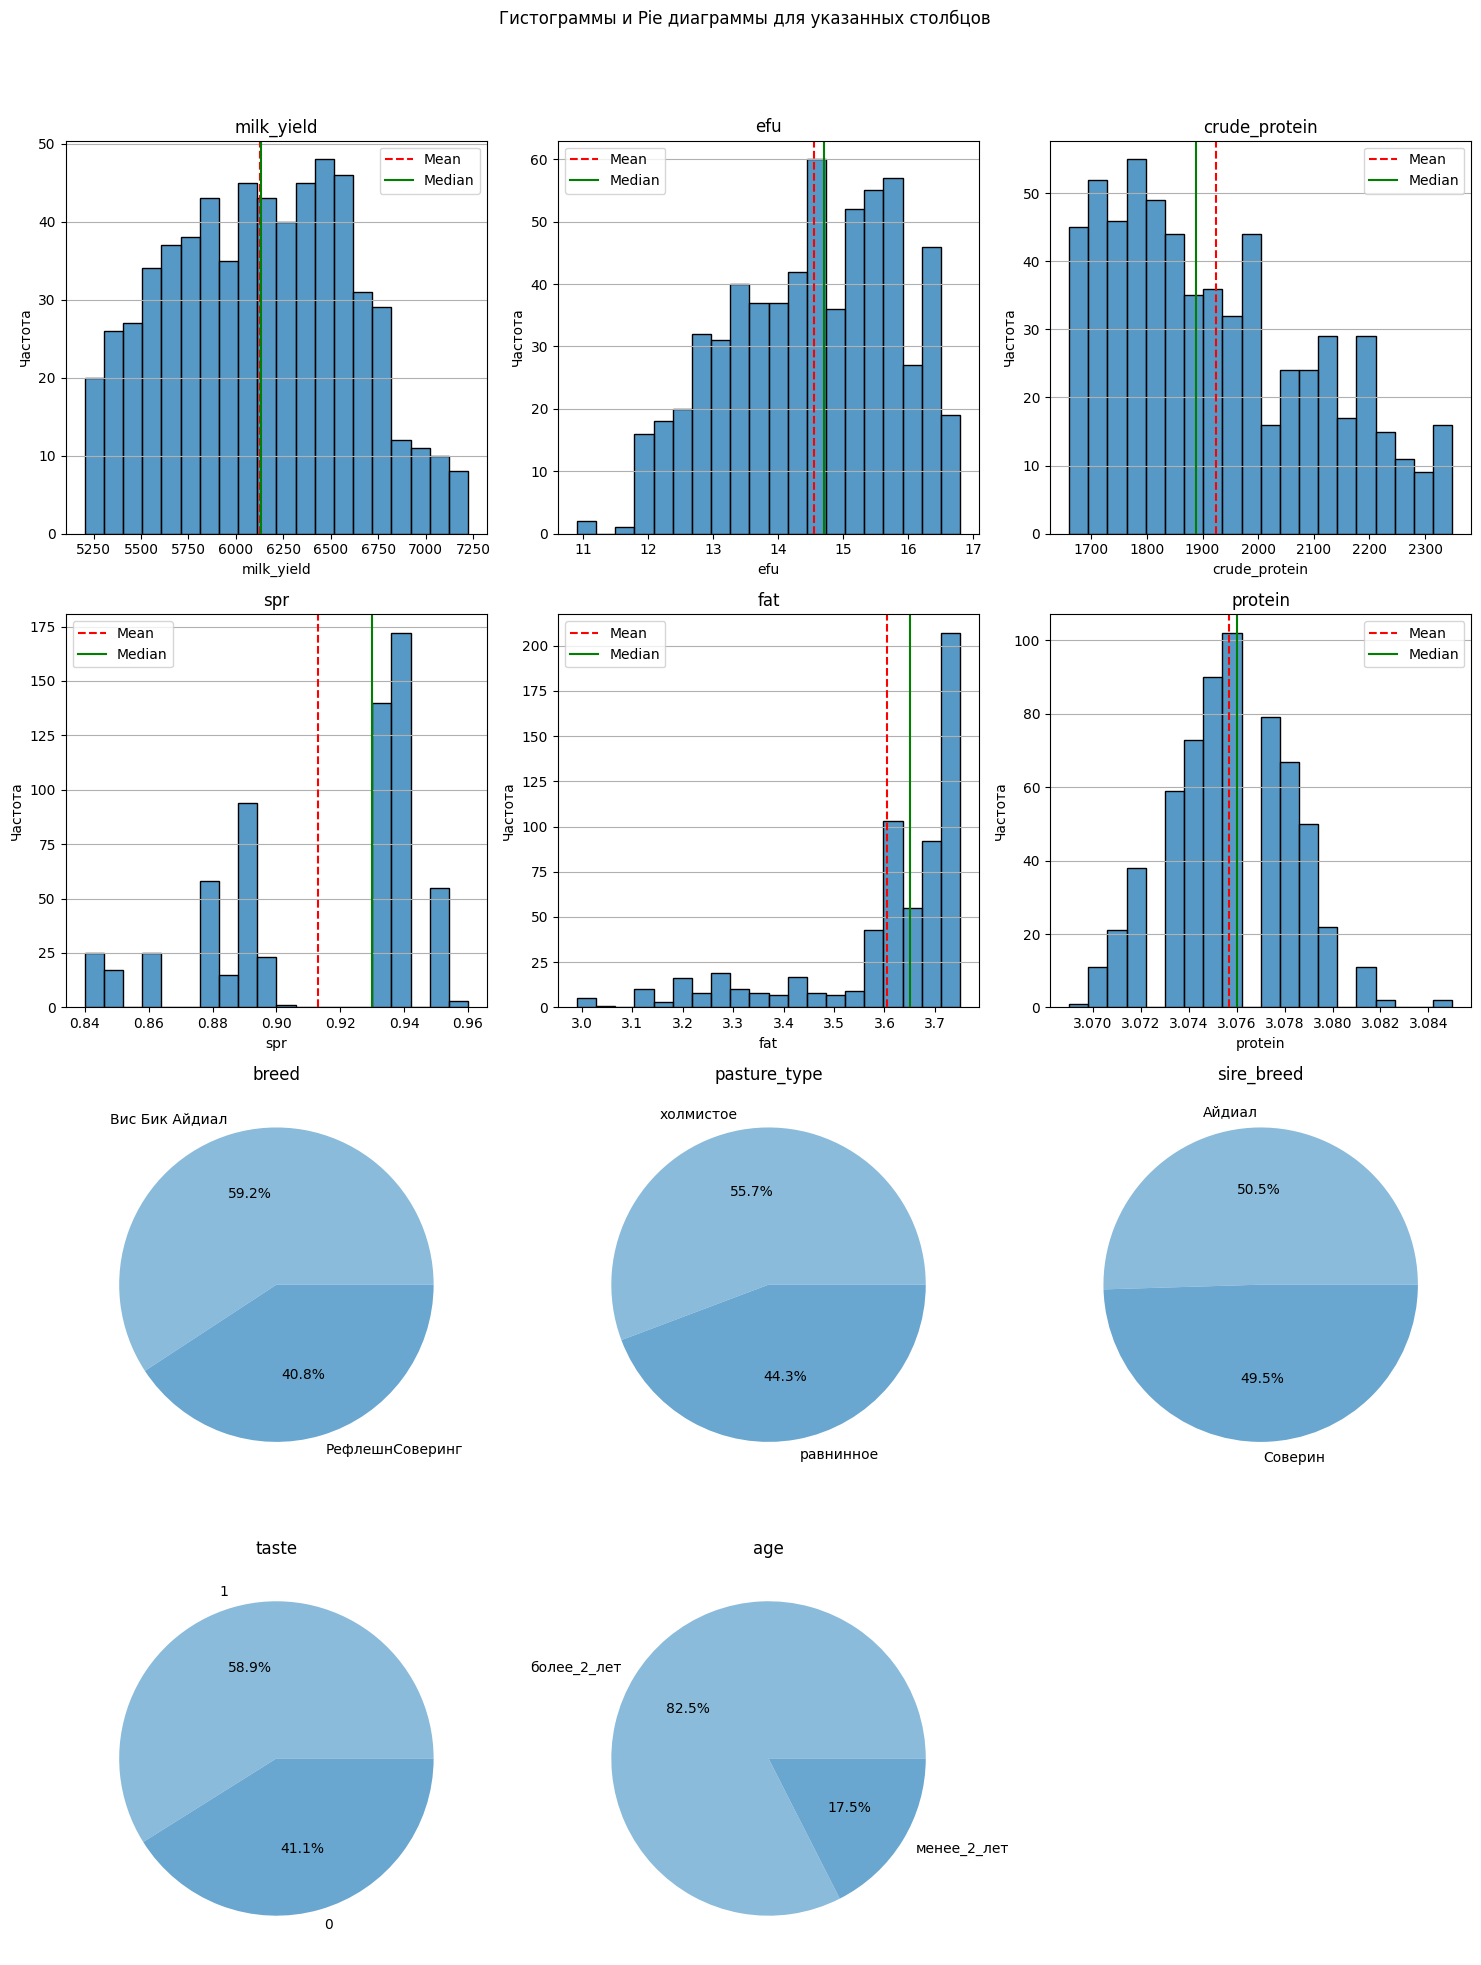

In [41]:
graphs_for_columns(ferma_main, num_col_names, cat_col_names)

Построим график для `cow_buy`

<AxesSubplot:ylabel='sire_name'>

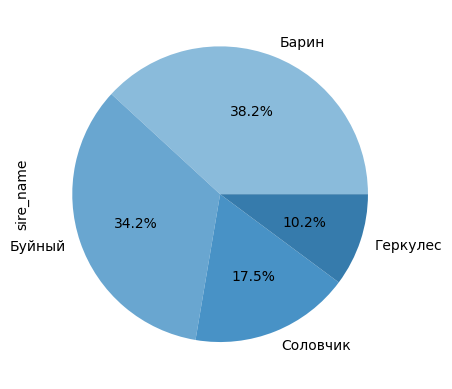

In [42]:
ferma_dad['sire_name'].value_counts().plot(kind='pie', 
                                           autopct='%1.1f%%',  
                                           colors=sns.color_palette('Blues_d'))

Применим функцию к датафрейму `cow_buy`

In [43]:
num_2_col_names = ['current_fat','current_protein']
cat_2_col_names = ['breed','pasture_type','sire_breed','sire_name','age']

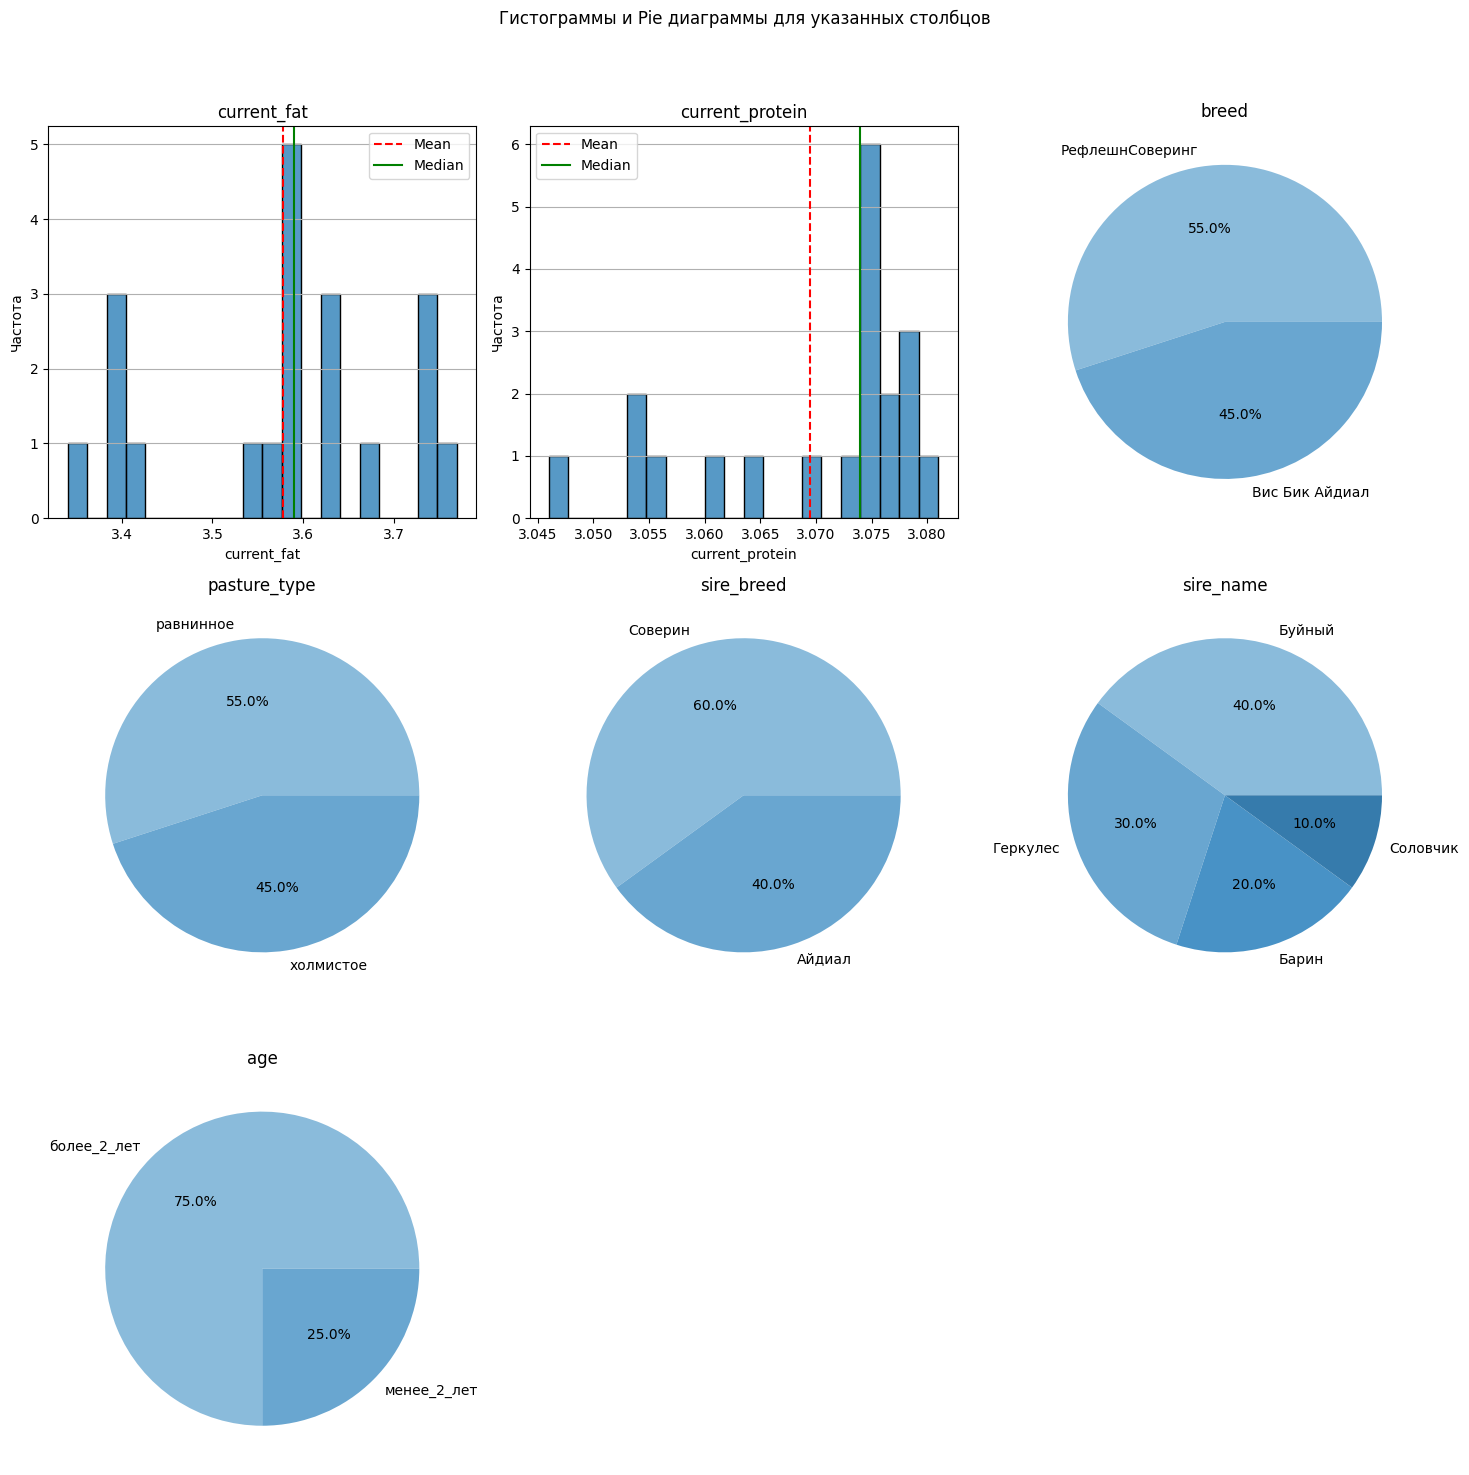

In [44]:
graphs_for_columns(cow_buy, num_2_col_names, cat_2_col_names)

### Вывод

* **Удой**: В распределении наблюдался выброс, мы его удалили. Гистограмма показывает правостороннее скошенное распределение, где большинство данных сосредоточено в левой части. Среднее значение больше медианы.

* **ЭКЕ**: Гистограмма выглядит нормально распределенной с почти равными средним и медианным значениями.

* **Сырой протеин**: Гистограмма левосторонне скошена с большинством данных в правой части, здесь медиана выше среднего значения.

*  **СПО**: Гистограмма показывает двухмодальное распределение с двумя отчетливыми пиками, указывающими на наличие двух групп в этом наборе данных. Оба средних и медианных значений попадают между этими пиками. В дальнейшем можно преобразовать эти данные в категориальные, разбив их на две группы: больше и меньше медианного или среднего значения. 

* **Жирность**: Гистограмма, выглядит нормально распределённой, но имеет острый пик, указывающий на то, что значения тесно сгруппированы вокруг среднего, которое в этом случае равно медиане.

* **Белок**: Гистограмма выглядит нормально распределенной с почти равными средним и медианным значениями.

## Корреляционный анализ

### Изучим взаимосвязь между признаками

Построим матрицу корреляции методом Спирмана для всех признаков датасета `ferma_main`, т.к. он подходит для нелинейных и ненормально распределенных данных

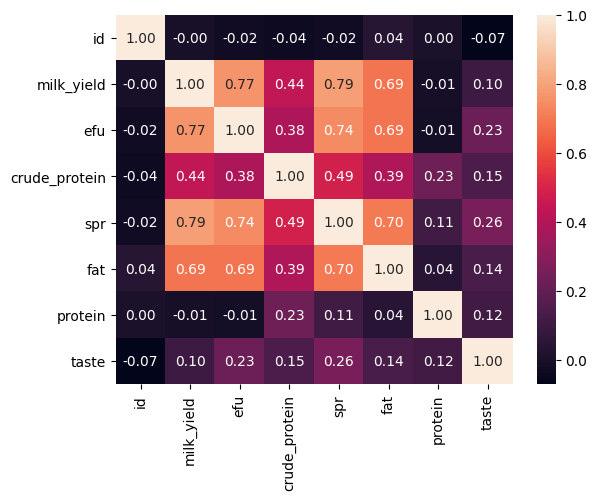

In [45]:
sns.heatmap(ferma_main.corr(method='spearman'), annot=True, fmt='.2f');

### Построим диаграммы рассеяния для признака Удой, кг

Напишем функцию для построения диаграмм рассеяния для признака Удой и всех количественных признаков, с учётом значения категориальных переменных.

In [46]:
def plot_scatter(df, n_columns, q_columns):
    # Перебираем столбцы
    for q_column in q_columns:
        # Рассчитываем количество строк и столбцов для сетки подграфика.
        num_rows = (len(n_columns) + 2) // 3
        num_cols = 3

        # Создаём график
        fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
        fig.suptitle(f'Диаграммы рассеяния: ЭКЕ, Сырой протеин, СПО, Жирность, Белок с признаком Удой, с разделением на подгруппы по {q_column}')
        axes = axes.flatten()

        # Перебираем числовые столбцы
        for i, n_column in enumerate(n_columns):
  
            # Создаём диаграмму рассеяния для Milk_yield с числовым столбцом, окрашенным в цвет категориального столбца.
            ax = axes[i]
            sns.scatterplot(
                data=df,
                x='milk_yield',
                y=n_column,
                hue=q_column,
                palette='tab10',
                ax=ax)
            ax.set_title(f'milk_yield - {n_column}')
            ax.set_xlabel('milk_yield')
            ax.set_ylabel(n_column)
            ax.grid(True)

        # Удаляем пустые подграфики
        for i in range(len(n_columns), len(axes)):
            fig.delaxes(axes[i])

        # Отображаем график
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

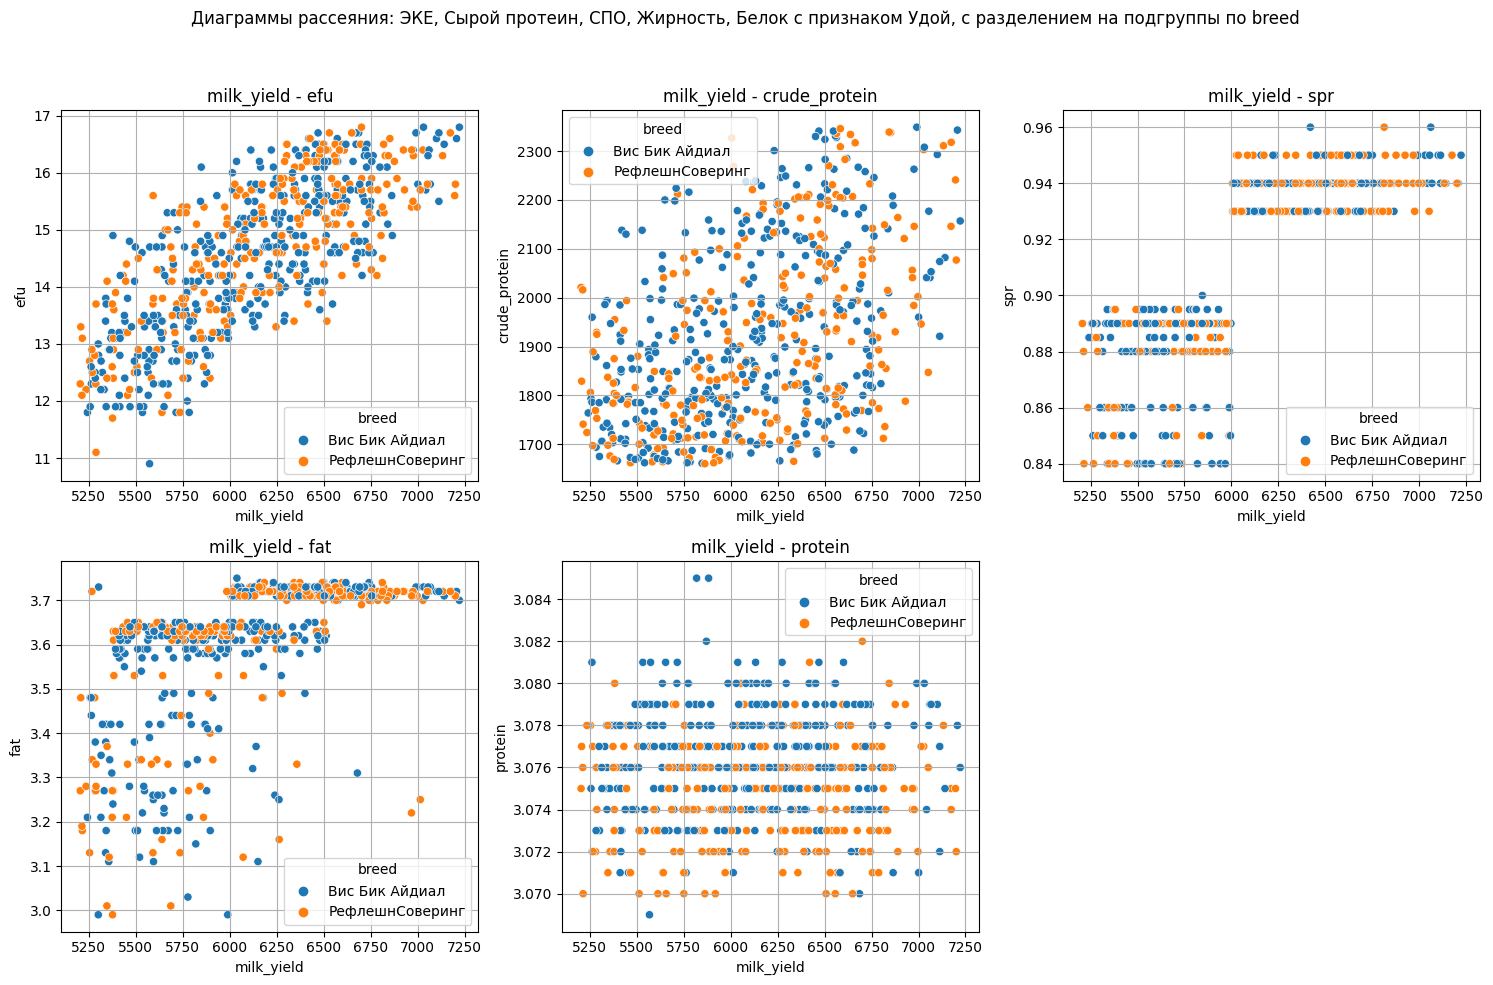

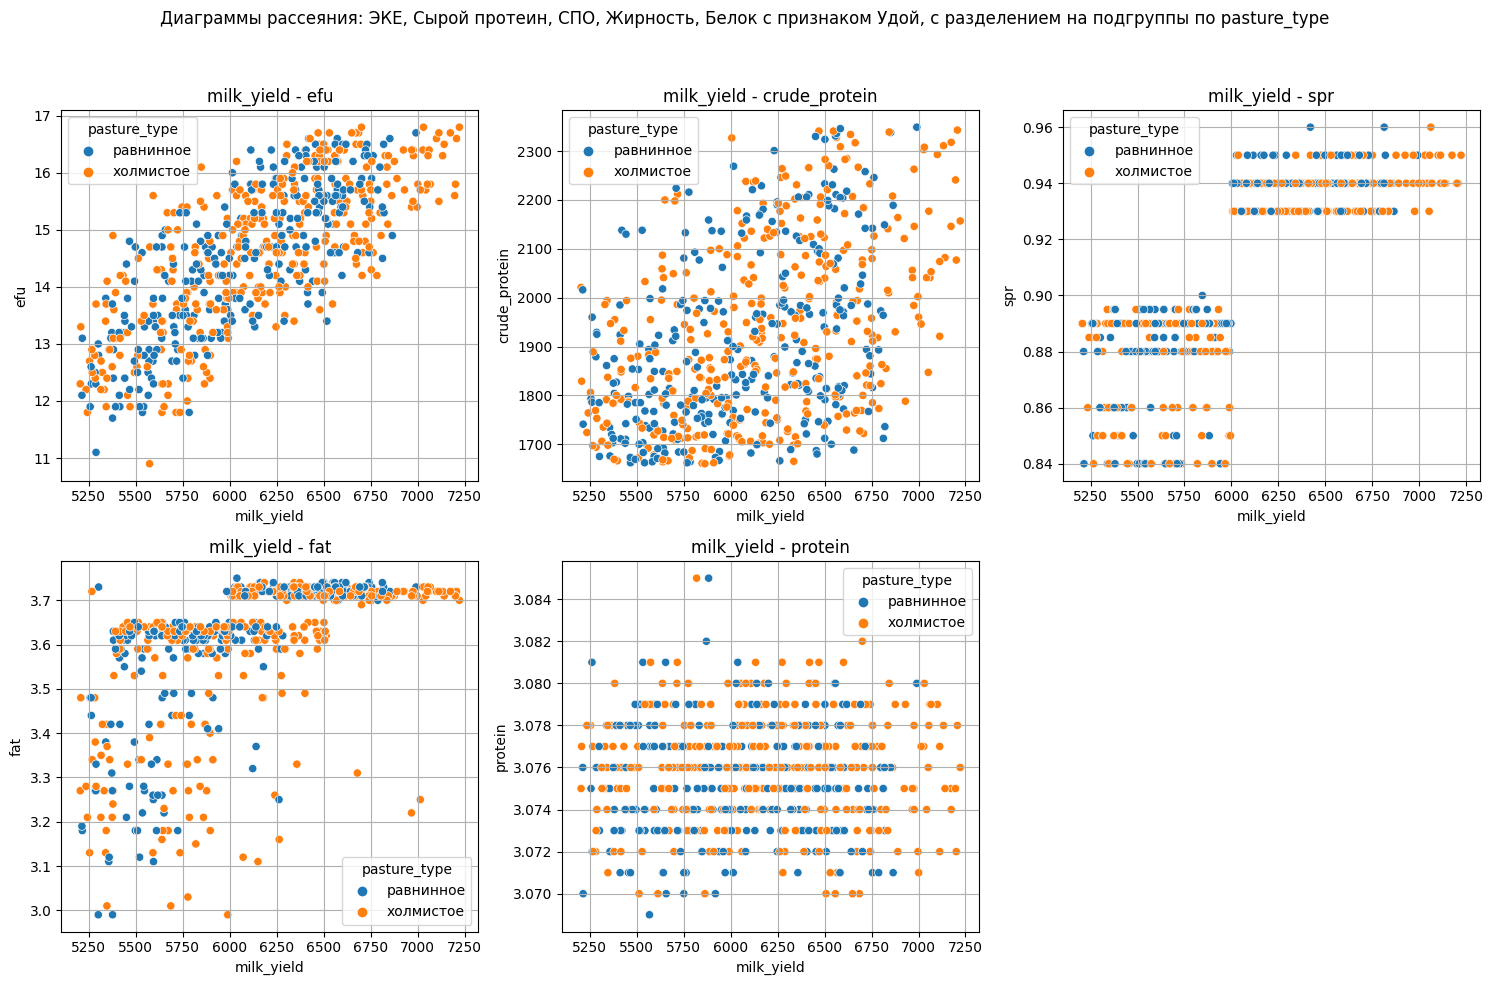

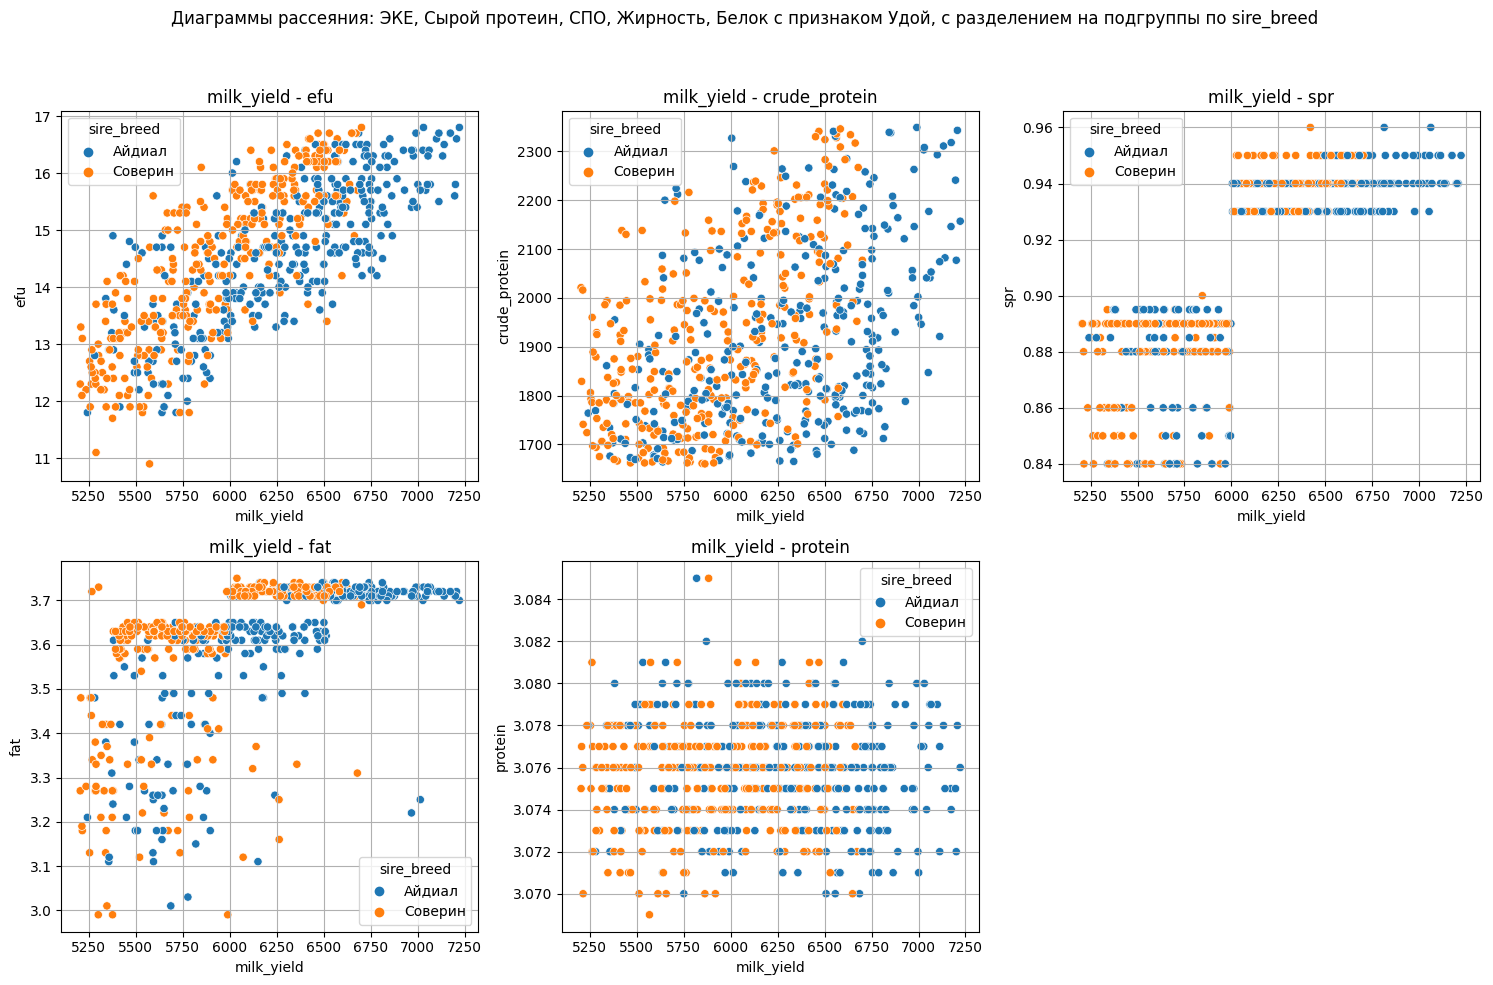

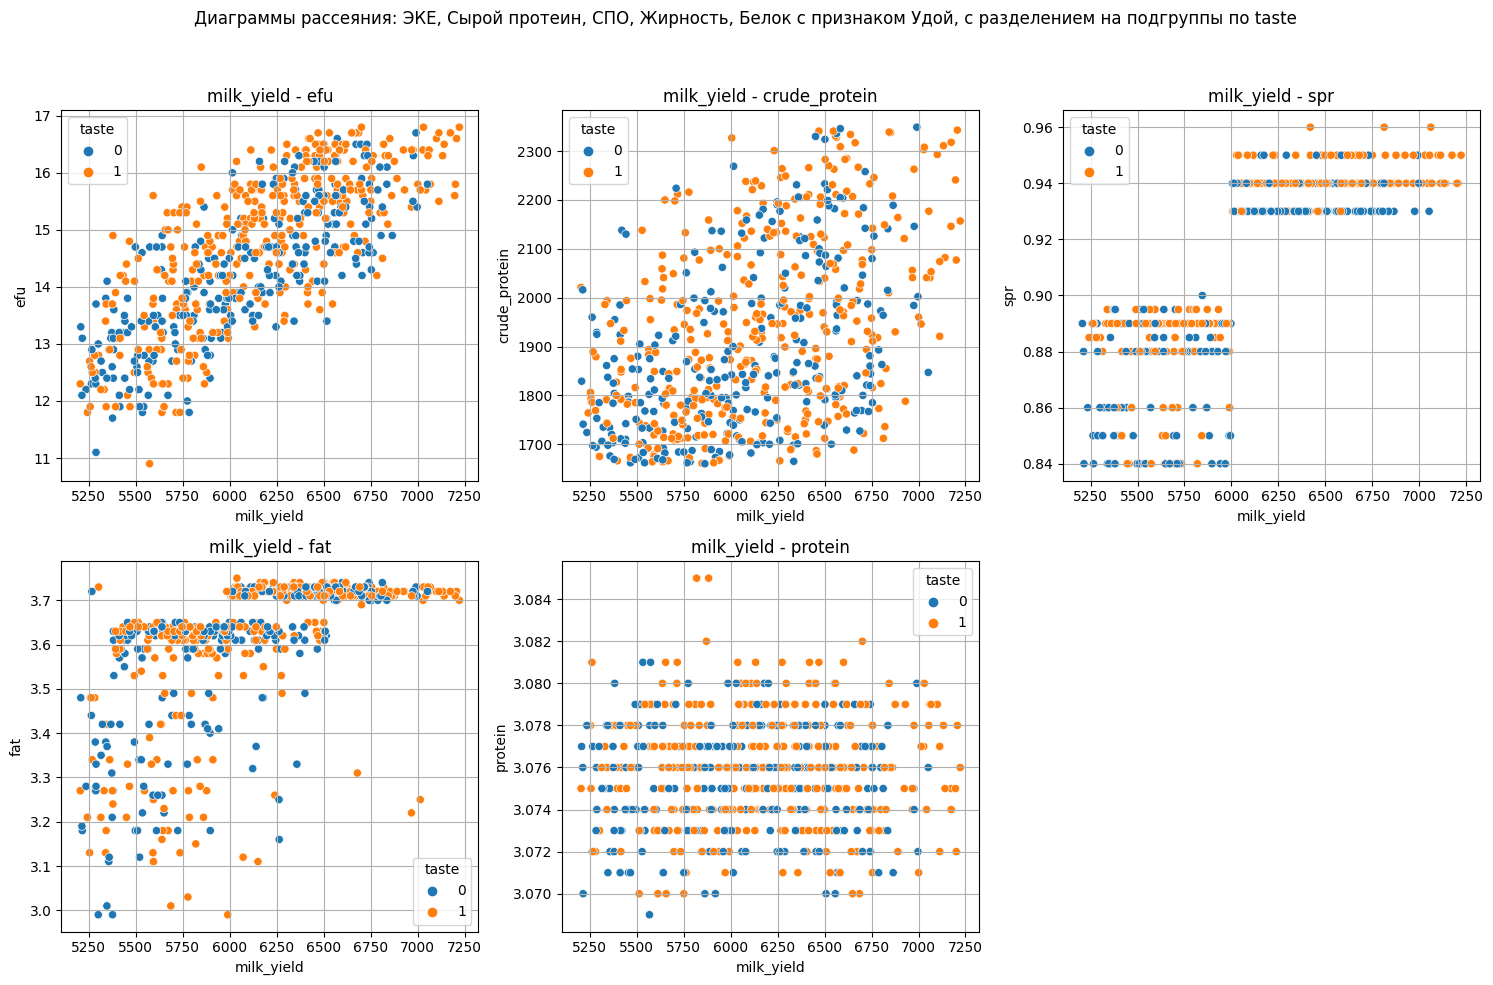

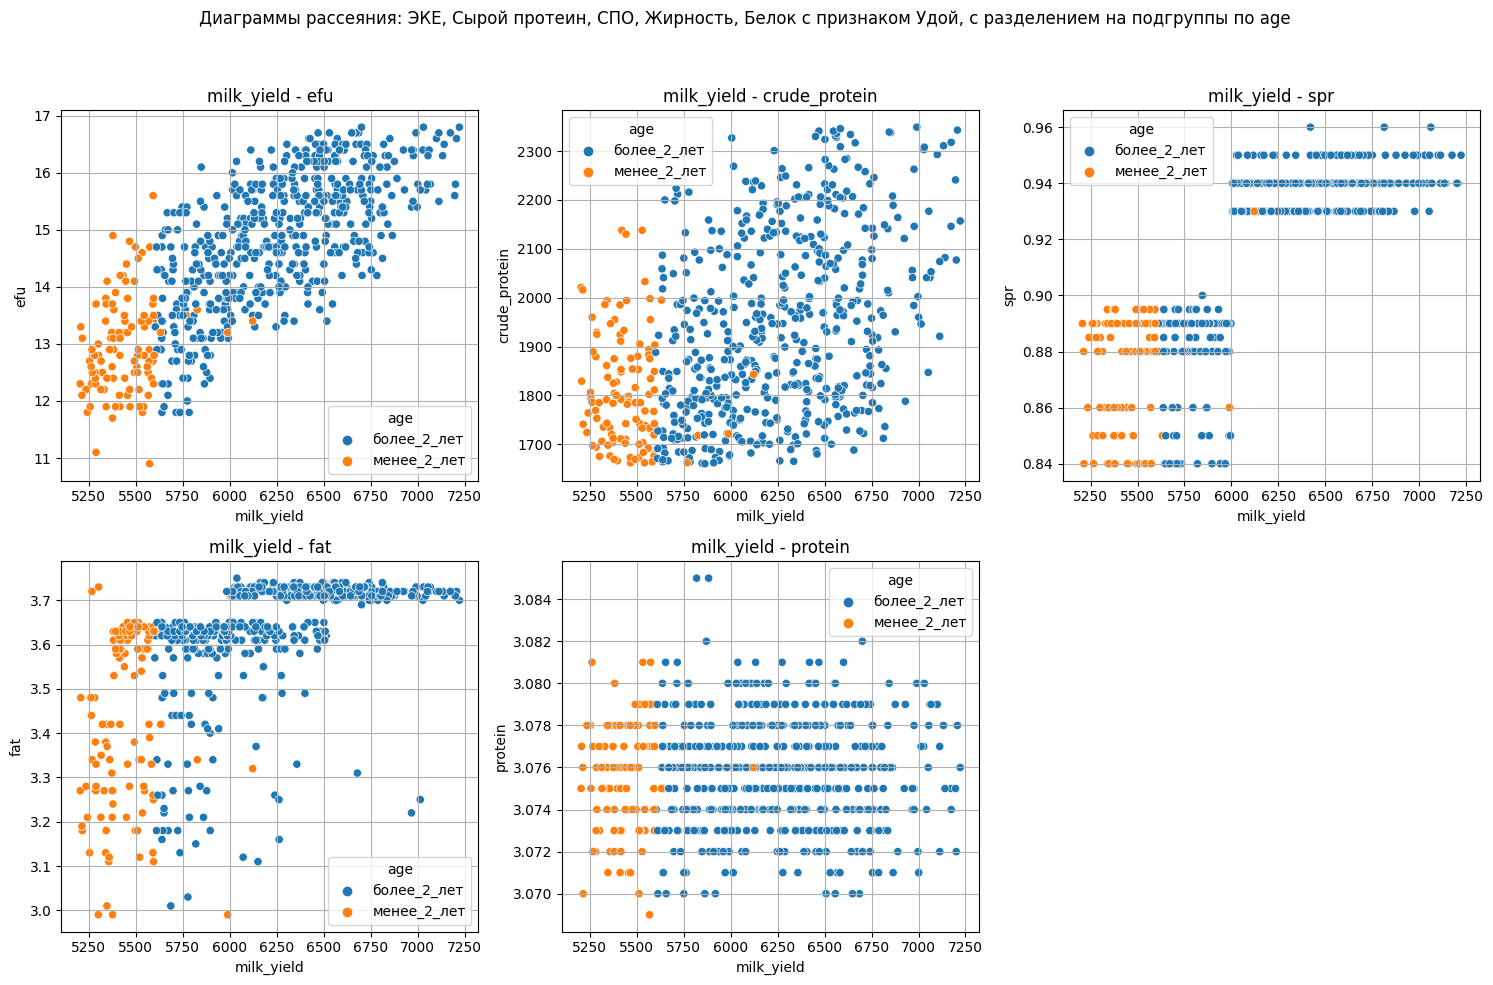

In [47]:
plot_scatter(ferma_main, num_col_names[1:], cat_col_names)

### Вывод

* С целевым признаком `Удой` имеют высокую положительную корреляцию: `ЭКЕ`, `СПО`, `Сырой протеин`, и `Возраст`.

* Для категориального признака `Вкус молока` очень слабую корреляцию проявляют признаки: `Возраст`, `Белок`, `Жирность`, `СПО`, `Сырой протеин`, `ЭКЕ`, `Удой молока`. 

~~* `ЭКЕ` и `Удой` проявляют достаточно высокую корреляцию с остальными признаками и вызывают мультиколлинеарность, при построении модели логистической регрессии их лучше исключить.~~

* Мультиколлинеарность между признаками отсутствует

* У потомства Айдиала в среднем выше содержание `ЭКЕ`, `СПО` и `сырого протеина` в корме, так же выше жирность и содержание белка в молоке. 
* У коров до 2 лет в среднем существенно ниже все параметры, по сравнению с остальными коровами. 
* Параметры коров с холмистых пастбищ немного выше параметров с равнинных пастбищ.

* `Удой` с `СПО` и `ЭКЕ` связан нелинейно, чтобы этого избежать, можно `СПО` перевести в категориальный признак, разбив их на две категории по медианному или среднему значению, чтобы `ЭКЕ` стал нелинейно связан с `Удоем`, можно попробовать добавить новый признак с возведённым значением `ЭКЕ` в квадрат.

## Обучение модели линейной регрессии

### Подготовим данные датасета `ferma_main` и обучим на них первую модель `LinearRegression`.

Используем в качестве целевого признак Удой, кг - `milk_yield`

In [48]:
target = 'milk_yield'

#### Отберём признаки, которые подходят для модели линейной регрессии

Выберем для модели категориальные и количественные признаки

С целевым признаком `Удой` имеют высокую положительную корреляцию: `ЭКЕ`, `СПО`, `Сырой протеин` и `Возраст`, так же на удой могут влиять `Порода коровы`, `Порода папы быка` а так же `Тип пастбища`. 
Разделим их на категориальные и количественные признаки, а остальные добавим в список на исключение

In [49]:
# категориальные признаки
cat_col_names = ['breed', 'pasture_type', 'sire_breed', 'age']
# количественные признаки
num_col_names = ['efu', 'spr', 'crude_protein']
# признаки, которые не будут участвовать в обучении модели
drop_col_names = ['id','fat', 'protein', 'taste']

In [50]:
ferma_main_t = ferma_main.drop(drop_col_names, axis=1)
ferma_main_t.head()

milk_yield   efu  crude_protein    spr            breed pasture_type  \
0        5863  14.2           1743  0.890   Вис Бик Айдиал    равнинное   
1        5529  12.8           2138  0.890   Вис Бик Айдиал    равнинное   
2        5810  14.0           1854  0.885  РефлешнСоверинг    холмистое   
3        5895  12.4           2012  0.885  РефлешнСоверинг    холмистое   
4        5302  12.8           1675  0.885   Вис Бик Айдиал    равнинное   

  sire_breed          age  
0     Айдиал  более_2_лет  
1    Соверин  менее_2_лет  
2    Соверин  более_2_лет  
3     Айдиал  более_2_лет  
4    Соверин  менее_2_лет

Напишем функцию для разбивки данных на тренировочную и тестовую выборки

In [51]:
def func_train_and_test(df, target):
    RANDOM_STATE = 42

    X = df.drop(target, axis=1)
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, 
        y, 
        random_state=RANDOM_STATE)
    return X_train, X_test, y_train, y_test

Напишем функцию для нормализации категориальных признаков с помощью `One-Hot Encoding`

In [52]:
def norm_cat_feat(X_train, X_test, cat_col_names):
    # Выберем метод кодирования
    encoder = OneHotEncoder(drop='first', sparse=False)

    # Обучим кодирование на тренировочной выборке
    encoder.fit(X_train[cat_col_names])

    # Кодируем тренировочную выборку
    X_train_ohe = encoder.transform(X_train[cat_col_names])

    # Кодируем тестовую выборку
    X_test_ohe = encoder.transform(X_test[cat_col_names])

    # Сохраним в переменной encoder_col_names названия новых столбцов 
    encoder_col_names = encoder.get_feature_names() 
    return X_train_ohe, X_test_ohe, encoder_col_names, encoder

Напишем функцию для масштабирования количественных признаков с помощью `StandardScaler`

In [53]:
def scal_quant_tr(X_train, X_test, num_col_names):
    # Выберем метод масштабирования
    scaler = StandardScaler()

    # Настрока масштабирования на тренировочной выборке
    scaler.fit(X_train[num_col_names])

    # Масштабирование тренировочной выборки 
    X_train_scaled = scaler.transform(X_train[num_col_names])

    # Масштабирование тестовой выборки 
    X_test_scaled = scaler.transform(X_test[num_col_names])
    
    return X_train_scaled, X_test_scaled, scaler

Напишем функцию для объедения получившихся выборок

In [54]:
def comb_samp(X_train_ohe, X_test_ohe, X_train_scaled, X_test_scaled, encoder_col_names):
    # создадим тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных
    # для данных OHE названия столбцов укажем из переменной encoder_col_names

    X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
    X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

    X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

    # объединим все преобразованные данные в тренировочный и тестовый датафреймы
    # сбросим индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

    X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
    X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)
    return X_train, X_test

Напишем функцию для обучения модели линейной регрессии на подготовленных данных

In [55]:
def model_training(X_train, y_train, X_test):
    # Объявим модель
    model_lr = LinearRegression()

    # Обучим модель
    model_lr.fit(X_train, y_train)

    # Получим предсказания
    predictions = model_lr.predict(X_test)
    return predictions, model_lr

Напишем функцию для оценки качества модели на тестовой выборке

In [56]:
def model_quality_assessment(y_test, predictions):
    # Рассчитаем R²
    r2 = r2_score(
        y_test,
        predictions
    )
    print(f'Коэффициент детерминации R²={r2:.3f}')
    
    # Проанализируем остатки с помощью графиков
    # Рассчитаем остатки
    residuals = y_test - predictions
    
    # Построим графики: гистограмму распределения остатков и диаграмму рассеяния
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

    # Рассчитаем среднее значение и медиану остатков
    mean_residuals = np.mean(residuals)
    median_residuals = np.median(residuals)

    # Рисуем гистограмму распределения остатков на первой оси
    sns.histplot(residuals, palette='Blues_d', ax=axes[0])
    axes[0].set_title('Гистограмма распределения остатков')
    axes[0].set_xlabel('Остатки')
    axes[0].set_ylabel('Частота')
    axes[0].axvline(mean_residuals, color='r', linestyle='--')
    axes[0].axvline(median_residuals, color='g', linestyle='-')
    axes[0].legend({'Mean': mean_residuals, 'Median': median_residuals})

    # Рисуем диаграмму рассеяния предсказаний и остатков на второй оси
    sns.scatterplot(x=predictions, y=residuals, palette='Blues_d', ax=axes[1])
    axes[1].set_xlabel('Предсказания модели')
    axes[1].set_ylabel('Остатки')
    axes[1].set_title('Диаграмма рассеивания')

    # Отображаем графики
    plt.tight_layout()
    plt.show()

Напишем функцию, которая будет подготавливать данные и обучать модель `LinearRegression`, с помощью написанных ранее функций

In [57]:
def model(df, cat_col_names, num_col_names, target):
    # Разобьём данные на тренировочную и тестовую выборки
    X_train, X_test, y_train, y_test = func_train_and_test(df, target)
    
    # Нормализуем категориальные признаки с помощью One-Hot Encoding
    X_train_ohe, X_test_ohe, encoder_col_names, encoder = norm_cat_feat(X_train, X_test, cat_col_names)
    
    # Масштабируем количественные признаки с помощью StandardScaler
    X_train_scaled, X_test_scaled, scaler = scal_quant_tr(X_train, X_test, num_col_names)
    
    # Объеденим получившиеся выборки
    X_train, X_test = comb_samp(X_train_ohe, X_test_ohe, X_train_scaled, X_test_scaled, encoder_col_names)
    # Обучим модель линейной регрессии на подготовленных данных
    predictions, model_lr = model_training(X_train, y_train, X_test)
    
    # Оценим качество модели на тестовой выборке
    model_quality_assessment(y_test, predictions)
    
    return predictions, X_train, y_train, y_test, encoder, scaler, model_lr

#### Обучим модель и оценим её качество

Применим функцию к нашим данным

Коэффициент детерминации R²=0.784


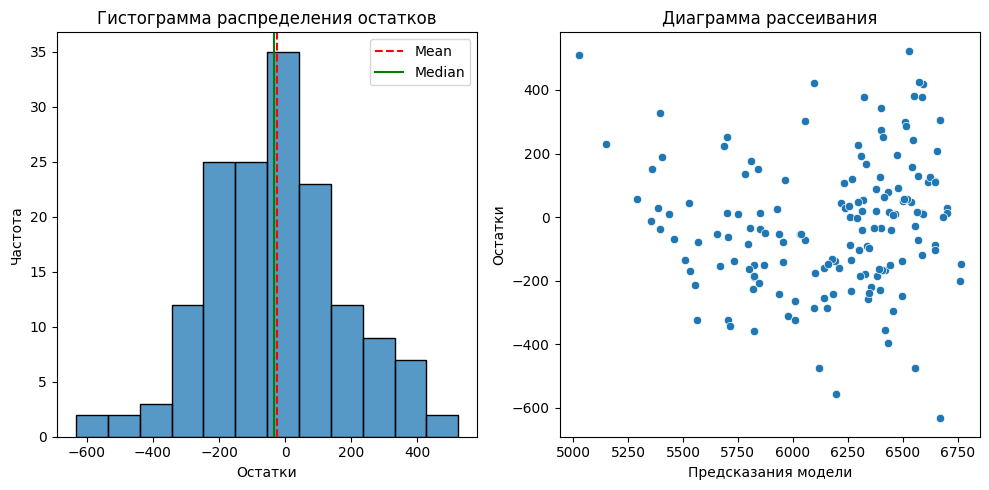

In [58]:
(predictions_1, X_train, y_train, y_test,
 encoder_1, scaler_1, model_1) = model(ferma_main_t,
                                       cat_col_names,
                                       num_col_names,
                                       target)

#### Вывод

* коэффициент детерминации R²=0.784, значение коэффициента детерминации близко к единице — модель хорошо себя показывает в 78 процентах случаев
* остатки имеют нормальное распределение с небольшим смещением влево, модель немного завышает прогнозные значения,  на диаграмме дисперсия остатков выглядит достаточно постоянной
* требуется улучшение модели, нужно избавиться от нелинейной завистимости параметров и(или) добавить дополнительные признаки 

### Подготовим данные с учётом связи входных признаков с целевым и обучим на них вторую модель `LinearRegression`

#### Отберём признаки, которые подходят для модели линейной регрессии

По диаграммам рассеяния мы сделали вывод, что `Удой` с `СПО` и `ЭКЕ` связан нелинейно. Исключим нелинейность, чтобы эти признаки были информативны для линейной регрессии:
* преобразуем `СПО` в категориальный бинарный признак, разбив значения на два кластера по порогу 0.92
* создадим новый признак `s_efu`, который будет равен `ЭКЕ` в квадрате.

In [59]:
ferma_main.loc[ferma_main['spr']<0.92, ['spr']] = 0
ferma_main.loc[ferma_main['spr']>=0.92, ['spr']] = 1
ferma_main_t = ferma_main.copy()
ferma_main_t.head()

id  milk_yield   efu  crude_protein  spr            breed pasture_type  \
0   1        5863  14.2           1743  0.0   Вис Бик Айдиал    равнинное   
1   2        5529  12.8           2138  0.0   Вис Бик Айдиал    равнинное   
2   3        5810  14.0           1854  0.0  РефлешнСоверинг    холмистое   
3   4        5895  12.4           2012  0.0  РефлешнСоверинг    холмистое   
4   5        5302  12.8           1675  0.0   Вис Бик Айдиал    равнинное   

  sire_breed   fat  protein  taste          age  
0     Айдиал  3.58    3.076      1  более_2_лет  
1    Соверин  3.54    3.079      1  менее_2_лет  
2    Соверин  3.59    3.074      0  более_2_лет  
3     Айдиал  3.40    3.075      0  более_2_лет  
4    Соверин  3.73    3.073      1  менее_2_лет

Переместим параметр `spr` из списка количественных в список категориальных

In [60]:
num_col_names.remove('spr')
cat_col_names.append('spr')

Добавим столбец `s_efu`, в который запишем возведённое значение ЭКЕ (`efu`) в квадрат

In [61]:
ferma_main_t['s_efu'] = ferma_main_t['efu']**4

Удалим из списка количественных параметров `efu` и добавим `s_efu`

In [62]:
num_col_names.remove('efu')
num_col_names.append('s_efu')
drop_col_names.append('efu')

ferma_main_t.head()

id  milk_yield   efu  crude_protein  spr            breed pasture_type  \
0   1        5863  14.2           1743  0.0   Вис Бик Айдиал    равнинное   
1   2        5529  12.8           2138  0.0   Вис Бик Айдиал    равнинное   
2   3        5810  14.0           1854  0.0  РефлешнСоверинг    холмистое   
3   4        5895  12.4           2012  0.0  РефлешнСоверинг    холмистое   
4   5        5302  12.8           1675  0.0   Вис Бик Айдиал    равнинное   

  sire_breed   fat  protein  taste          age       s_efu  
0     Айдиал  3.58    3.076      1  более_2_лет  40658.6896  
1    Соверин  3.54    3.079      1  менее_2_лет  26843.5456  
2    Соверин  3.59    3.074      0  более_2_лет  38416.0000  
3     Айдиал  3.40    3.075      0  более_2_лет  23642.1376  
4    Соверин  3.73    3.073      1  менее_2_лет  26843.5456

Построим диаграмму рассеивания для `s_efu` и `milk_yield`

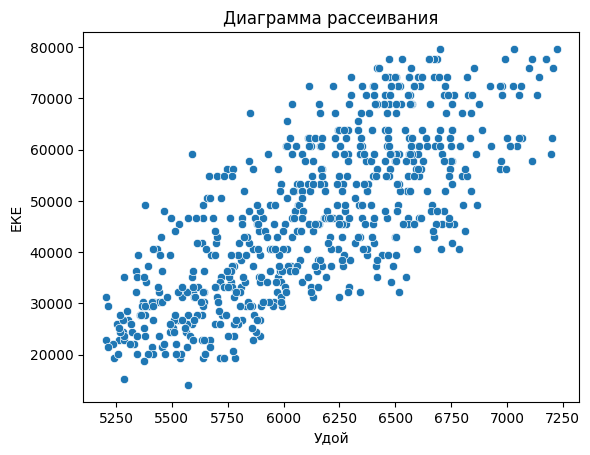

In [63]:
sns.scatterplot(data=ferma_main_t, x='milk_yield', y='s_efu', palette='Blues_d')
plt.title('Диаграмма рассеивания')
plt.xlabel('Удой')
plt.ylabel('ЕКЕ')
plt.show()

In [64]:
drop_col_names

['id', 'fat', 'protein', 'taste', 'efu']

In [65]:
ferma_main_m = ferma_main_t.drop(drop_col_names, axis=1)
ferma_main_m.head()

milk_yield  crude_protein  spr            breed pasture_type sire_breed  \
0        5863           1743  0.0   Вис Бик Айдиал    равнинное     Айдиал   
1        5529           2138  0.0   Вис Бик Айдиал    равнинное    Соверин   
2        5810           1854  0.0  РефлешнСоверинг    холмистое    Соверин   
3        5895           2012  0.0  РефлешнСоверинг    холмистое     Айдиал   
4        5302           1675  0.0   Вис Бик Айдиал    равнинное    Соверин   

           age       s_efu  
0  более_2_лет  40658.6896  
1  менее_2_лет  26843.5456  
2  более_2_лет  38416.0000  
3  более_2_лет  23642.1376  
4  менее_2_лет  26843.5456

#### Обучим модель и оценим её качество

In [66]:
cat_col_names

['breed', 'pasture_type', 'sire_breed', 'age', 'spr']

In [67]:
num_col_names

['crude_protein', 's_efu']

Коэффициент детерминации R²=0.819


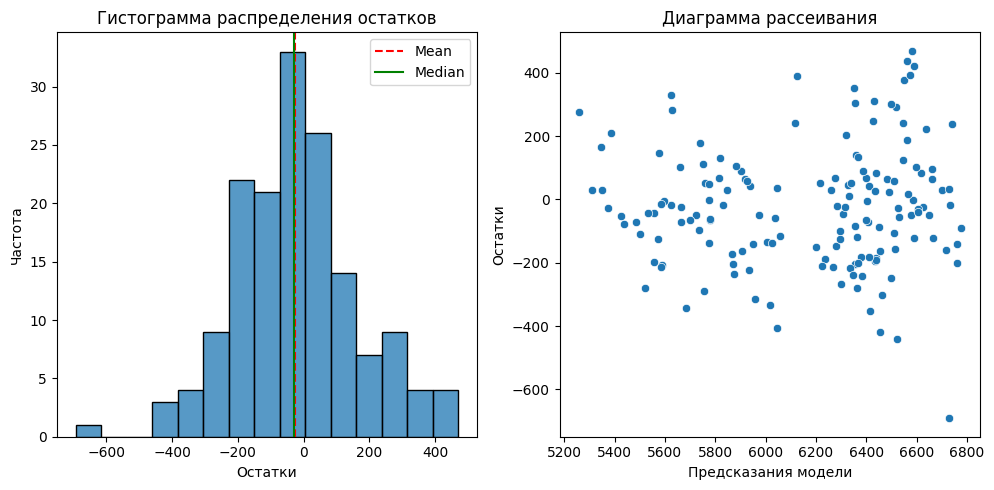

In [68]:
(predictions_2, X_train, y_train, y_test,
 encoder_2, scaler_2, model_2) = model(ferma_main_m,
                                       cat_col_names,
                                       num_col_names,
                                       target)

#### Вывод

* значение коэффициента детерминации R²=0.819 повысилось
* остатки имеют нормальное распределение с небольшими выбросами, на диаграмме рассеивания начинает виднеться «рупор» - модель непредсказуема, а её прогнозы — ненадёжны
* требуется улучшение модели, добавим дополнительный признак

### Добавим в данные новый признак и обучим на них третью модель `LinearRegression`

#### Добавим признак Имя Папы `sire_name` из датафрейма `ferma_dad`, соединив его с остальными данными `ferma_main` по ключу

In [69]:
ferma_main_t.shape

(628, 13)

In [70]:
ferma_main_t = ferma_main_t.merge(
    ferma_dad,
    on='id',
    how='left'
)

In [71]:
ferma_main_t.shape

(628, 14)

Добавим в список категориальных параметров `sire_name`

In [72]:
cat_col_names.append('sire_name')

Удалим из списка категориальных параметров `sire_breed`

In [73]:
drop_col_names.append('sire_breed')
cat_col_names.remove('sire_breed')

In [74]:
drop_col_names

['id', 'fat', 'protein', 'taste', 'efu', 'sire_breed']

In [75]:
ferma_main_m = ferma_main_t.drop(drop_col_names, axis=1)
ferma_main_m.head()

milk_yield  crude_protein  spr            breed pasture_type          age  \
0        5863           1743  0.0   Вис Бик Айдиал    равнинное  более_2_лет   
1        5529           2138  0.0   Вис Бик Айдиал    равнинное  менее_2_лет   
2        5810           1854  0.0  РефлешнСоверинг    холмистое  более_2_лет   
3        5895           2012  0.0  РефлешнСоверинг    холмистое  более_2_лет   
4        5302           1675  0.0   Вис Бик Айдиал    равнинное  менее_2_лет   

        s_efu sire_name  
0  40658.6896    Буйный  
1  26843.5456  Соловчик  
2  38416.0000     Барин  
3  23642.1376    Буйный  
4  26843.5456     Барин

#### Обучим модель и оценим её качество

In [76]:
cat_col_names

['breed', 'pasture_type', 'age', 'spr', 'sire_name']

In [77]:
num_col_names

['crude_protein', 's_efu']

Коэффициент детерминации R²=0.829


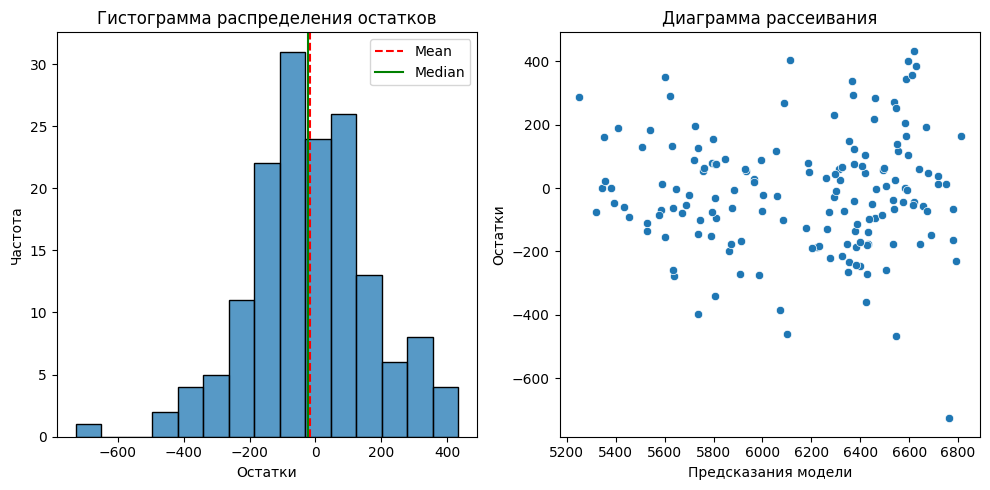

In [78]:
(predictions_3, X_train, y_train, y_test, 
 encoder_3, scaler_3, model_3) = model(ferma_main_m, 
                                        cat_col_names, 
                                        num_col_names, 
                                        target)

#### Вывод

* значение коэффициента детерминации немного повысилось R²=0.829
* остатки имеют нормальное распределение с небольшими выбросами, диаграмма рассеивания стала более равномерной

### Сравним качество трёх моделей линейной регрессии, сопоставим их R² и остатки

Коэффициент детерминации R² третьей модели максимальный и составляет 0.829, остатки первой модели сильнее смещены влево, на графике остатков третьей модели заметны выбросы.

### Оценим качество каждой модели по трём метрикам: MSE, MAE, RMSE

In [79]:
predictions = [predictions_1, predictions_2, predictions_3]

for prediction, i in zip(predictions, range(1,4)):
    
    mse = mean_squared_error(
        y_test,
        prediction
    )
    mae = mean_absolute_error(
        y_test,
        prediction    
    )
    rmse = mean_squared_error(
        y_test,
        prediction,
        squared=False
    )
    print(f'Рассчитанные метрики для модели №{i}')
    print(f'MSE = {mse:.1f}, MAE = {mae:.1f}, RMSE = {rmse:.1f}')
    print()

Рассчитанные метрики для модели №1
MSE = 43887.0, MAE = 164.2, RMSE = 209.5

Рассчитанные метрики для модели №2
MSE = 36791.2, MAE = 149.0, RMSE = 191.8

Рассчитанные метрики для модели №3
MSE = 34905.5, MAE = 143.8, RMSE = 186.8



#### Выберем лучшую модель

Остатки всех моделей распределены нормально с небольшими выбросами, что является хорошим знаком для линейной регрессии, но у третьей модели все метрики меньше, следовательно она более эффективна и точнее можеет предсказать `Удой`. 

#### Доверительный интервал прогноза лучшей модели

Рассчитаем квантили ошибки на тренировочных данных

In [80]:
# Рассчитываем среднее значение
mean = np.mean(predictions_3)

# Рассчитываем стандартное отклонение
sem = st.sem(predictions_3)

# Z-оценка для 95% доверительного интервала
z_score = 1.96

error = sem*z_score

# Рассчитываем доверительный интервал
confidence_interval = (mean - error, mean + error)
print(f'95% доверительный интервал = {confidence_interval }')

95% доверительный интервал = (6094.465079538573, 6223.352714424296)


Так как для фермера важно, чтобы бурёнка давала не менее 6000 килограммов молока в год, то при рассчёте прогнозных значений вычтем доверительный полуинтервал

### С помощью лучшей модели спрогнозируем удой коров, которых фермер хочет купить

In [81]:
cow_buy_t = cow_buy.copy()

#### Добавим недостающие признаки `ЭКЕ` (Энергетическая кормовая единица), `Сырой протеин`, г и `СПО` (Сахаро-протеиновое соотношение)

Возьмём из датасета `ferma_main` средние значения каждого из признаков и увеличим их на 5%

In [82]:
cow_buy_t['efu'] = ferma_main['efu'].mean()*1.05

In [83]:
cow_buy_t['crude_protein'] = ferma_main['crude_protein'].mean()*1.05

In [84]:
cow_buy_t['spr'] = ferma_main['spr'].mean()*1.05

In [85]:
cow_buy_t.head()

breed pasture_type sire_breed sire_name  current_fat  \
0   Вис Бик Айдиал    холмистое     Айдиал  Геркулес         3.58   
1   Вис Бик Айдиал    равнинное    Соверин    Буйный         3.54   
2  РефлешнСоверинг    равнинное    Соверин     Барин         3.59   
3  РефлешнСоверинг    холмистое     Айдиал    Буйный         3.40   
4  РефлешнСоверинг    равнинное     Айдиал    Буйный         3.64   

   current_protein          age        efu  crude_protein       spr  
0            3.076  более_2_лет  15.276162    2019.947532  0.618631  
1            3.081  менее_2_лет  15.276162    2019.947532  0.618631  
2            3.074  более_2_лет  15.276162    2019.947532  0.618631  
3            3.061  более_2_лет  15.276162    2019.947532  0.618631  
4            3.074  более_2_лет  15.276162    2019.947532  0.618631

#### Выполним подготовку данных, аналогичную той, которую делали для тренировочной выборки

In [86]:
cow_buy_t.loc[cow_buy_t['spr']<cow_buy_t['spr'].mean(), ['spr']] = 0
cow_buy_t.loc[cow_buy_t['spr']>=cow_buy_t['spr'].mean(), ['spr']] = 1

In [87]:
cow_buy_t['s_efu'] = cow_buy_t['efu']**2

#### Получим прогноз удоя коров

Напишем функцию для подготовки данных и получения предсказания

In [88]:
def predict_new_data(df_new, model, encoder, scaler, 
                     drop_col_names, num_col_names, cat_col_names,error):
    
    # Расположим столбцы в датафрейме в нужном порядке
    df_new = df_new[ferma_main_m.drop('milk_yield', axis=1).columns]
    
    # Нормализуем категориальные признаки с помощью уже обученного One-Hot Encoder
    df_new_ohe = encoder.transform(df_new[cat_col_names])
    
    # Масштабируем количественные признаки с помощью уже обученного StandardScaler
    df_new_scaled = scaler.transform(df_new[num_col_names])
    
    # Объединим получившиеся выборки
    df_new_prepared = np.concatenate([df_new_ohe, df_new_scaled], axis=1)
    
    # Используем обученную модель для получения предсказаний
    new_predictions = model.predict(df_new_prepared)-error
    
    return new_predictions

In [89]:
cat_col_names

['breed', 'pasture_type', 'age', 'spr', 'sire_name']

In [90]:
num_col_names

['crude_protein', 's_efu']

In [91]:
drop_col_names = ['current_fat', 'current_protein', 'efu']

Применим функцию

In [ ]:
new_predictions_y = predict_new_data(cow_buy_t, model_3, encoder_3, scaler_3, 
                     drop_col_names, num_col_names, cat_col_names, error)

In [ ]:
(new_predictions_y>6000).sum()

20 коров подходят под требования фермера по удою молока

## Обучение модели логистической регрессии

### Подготовим данные датасета `ferma_main` и обучим на них модель `LogisticRegression`

Используем в качестве целевого признак Вкус молока - `milk`

In [ ]:
target = 'taste'

#### Преобразуем имеющиеся признаки

Выберем для модели категориальные и количественные признаки: 

In [ ]:
cat_col_names = ['pasture_type', 'sire_breed', 'spr', 'age', 'breed']
num_col_names = ['crude_protein', 'protein', 'fat', 'efu']
drop_col_names = ['id',  'milk_yield']

In [ ]:
ferma_main.head()

In [ ]:
ferma_main_w = ferma_main.drop(drop_col_names, axis=1)
ferma_main_w.head()

Напишем функцию, которая будет подготавливать данные, с помощью написанных ранее функций

In [ ]:
def data_preparation(df, cat_col_names, num_col_names, target):
    # Разобьём данные на тренировочную и тестовую выборки
    X_train, X_test, y_train, y_test = func_train_and_test(df, target)
    
    # Нормализуем категориальные признаки с помощью One-Hot Encoding
    X_train_ohe, X_test_ohe, encoder_col_names, encoder = norm_cat_feat(X_train, X_test, cat_col_names)
    
    # Масштабируем количественные признаки с помощью StandardScaler
    X_train_scaled, X_test_scaled, scaler = scal_quant_tr(X_train, X_test, num_col_names)
    
    # Объеденим получившиеся выборки
    X_train, X_test = comb_samp(X_train_ohe, X_test_ohe, X_train_scaled, X_test_scaled, encoder_col_names)
    
    return X_train, y_train, X_test, y_test, encoder, scaler

Применим функцию к нашим данным

In [ ]:
X_train, y_train, X_test, y_test, encoder, scaler = data_preparation(ferma_main_w, cat_col_names, num_col_names, target)

#### Обучим модель и оценим её качество

Обучим модель `LogisticRegression`

In [ ]:
# Создаём объект для работы с моделью
clf = LogisticRegression()

# Настраиваем модель на данные
clf = clf.fit(X_train, y_train)

# Получаем прогнозные значения
predictions = clf.predict(X_test)

Оценим качество модели на тестовой выборке

In [ ]:
accuracy = accuracy_score(
    y_test,
    predictions
)

recall = recall_score(
    y_test,
    predictions
)

precision = precision_score(
    y_test,
    predictions
)

print(f'Accuracy = {accuracy:.2f}, Recall = {recall:.2f}, Precision = {precision:.2f}')
print()
print(f'Построим матрицу ошибок')
cm = confusion_matrix(
    y_test,
    predictions
)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted')
plt.show()

### Проанализируем модель логистической регрессии

#### Какая ошибка критичнее всего при покупке коров: первого или второго рода?

* Ошибка первого рода (False Positive): Это случай, когда мы неверно отмечаем корову как способную давать вкусное молоко (положительный результат), хотя она на самом деле не обладает этой способностью.

* Ошибка второго рода (False Negative): Это случай, когда мы неверно пропускаем корову, способную давать вкусное молоко (отрицательный результат), хотя она на самом деле обладает этой способностью.

Так как заказчику важно, чтобы все отмеченные коровы действительно давали вкусное молоко, ошибки первого рода могут негативно повлиять на качество продукции. Поэтому нам нужно воспользоваться метрикой `precision`, которая измеряет, насколько точно мы классифицируем положительные случаи. В данном случае, это доля коров, которые действительно дают вкусное молоко.

#### Сведём критичную ошибку к нулю

Подберём оптимальный порог принадлежности к классам

In [ ]:
# Получим оценки вероятности для класса
y_proba = clf.predict_proba(X_test)[:,1]


data = pd.DataFrame(zip(y_test, y_proba),
             columns = ['y_valid', 'y_proba']).sort_values(by='y_proba',ascending=False)

# Создадим список с порогами
thresholds = [round(i,2) for i in np.linspace(0.7,0.8,num = 10,endpoint=False)]


# Инициализируем пустой список для хранения результатов
results = []

# Проходим по каждому порогу
for threshold in thresholds:
    # Применяем порог к вероятностям для получения предсказанных классов
    y_pred = [1 if proba >= threshold else 0 for proba in y_proba]
    
    # Вычисляем recall и precision
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    # Считаем фактические 1 и 0
    actual_1 = list(y_test).count(1)
    actual_0 = list(y_test).count(0)
    
    # Вычисляем tn, fp, fn, tp
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    # Добавляем результаты для этого порога в список результатов
    results.append([threshold, recall, precision, fp, fn, tp, tn, actual_1, actual_0])

# Преобразуем список результатов в DataFrame
results_df = pd.DataFrame(results, columns=['Порог', 'Recall', 'Precision', 'FP', 'FN', 'TP', 'TN', 'Всего верных 1', 'Всего верных 0'])

# Выводим результаты DataFrame
results_df

In [ ]:
threshold = 0.79

Выберем порог принадлежности к классам: 0.74, при котором количество ошибок первого рода сводится к минимуму, а метрика `Precision` поднимается до 0.84, в тоже время метрика `Recall` падает до 0.24

Для получения прогноза вкуса молока коров подготовим данные и сравним предсказанные значения с выбранным порогом принадлежности

### С помощью обученной модели спрогнозируем вкус молока коров, которых фермер хочет купить

#### Выполним подготовку данных, аналогичную той, которую делали для тренировочной выборки.

In [ ]:
cow_buy_t.head()

In [ ]:
ferma_main_w.head()

Удалим лишние колонки

In [ ]:
cow_buy_t = cow_buy_t.drop(['sire_name','s_efu'], axis=1)

Переименуем `current_fat` и `current_protein`

In [ ]:
cow_buy_t = cow_buy_t.rename(columns={'current_fat':'fat', 'current_protein':'protein'})

Расположим колонки в нужном порядке

In [ ]:
cow_buy_t = cow_buy_t[ferma_main_w.drop('taste', axis=1).columns]
cow_buy_t.head()

In [ ]:
ferma_main_w.head()

In [ ]:
cat_col_names

In [ ]:
num_col_names

Нормализуем категориальные признаки с помощью уже обученного `One-Hot Encoder`

In [ ]:
cow_buy_t_ohe = encoder.transform(cow_buy_t[cat_col_names])

Масштабируем количественные признаки с помощью уже обученного `StandardScaler`

In [ ]:
cow_buy_t_scaled = scaler.transform(cow_buy_t[num_col_names])

Объединим получившиеся выборки

In [ ]:
cow_buy_t = np.concatenate([cow_buy_t_ohe, cow_buy_t_scaled], axis=1)

#### Получим прогноз вкуса молока коров

In [ ]:
new_predictions_t = (clf.predict_proba(cow_buy_t)[:,1] > threshold)*1
new_predictions_t

## Итоговые выводы

### Добавим прогнозы вкуса молока и удоя коров «ЭкоФермы» в датафрейм с коровами, покупку которых рассматривает фермер

In [ ]:
cow_buy['milk_yield'] = new_predictions_y
cow_buy['taste'] = new_predictions_t
cow_buy.head()

### Отберём коров, для которых спрогнозирован удой более 6000 килограммов в год и вкусное молоко

In [ ]:
cow_buy.query('milk_yield > 6000 and taste == 1')

### Результаты работы моделей для фермера

С минимальным риском фермер может купить только две коровы, потому что если минимизировать ошибки модели, то модель очень требовательно отбирает объекты. В результате мы получаем очень ограниченное количество вариантов, соответствующих нашим строгим критериям

Для того, чтобы у нас появился больший выбор, нам нужно:
* ослабить требования к коровам
* расмотреть большее количество вариантов
* предоставить больше параметров коров для построения моделей
* предоставить больше коров с их параметрами

### Выводы о моделях линейной регрессии и логистической регрессии

В данном проекте для улучшения качества регрессионной модели мы избавились от нелинейной зависимости путём возведения в квадрат значения признака и преобразования количественного признака в категориальный бинарный признак. Так же мы использовали добавление нового признака для улучшения модели.

Модели можно улучшить, если в наши датасеты будут добавлены дополнительные признаки, которые влияют на наши целевые признаки или, возможно, мы улучшим модель, если у нас будет информация о большем объеме стада коров.

При анализе рисков или экономических расчетов в зависимости от задачи и требований важны разные метрики:

* `Accuracy` - доля правильно классифицированных объектов, однако эта метрика может быть вводящей в заблуждение, если классы несбалансированы

* `Recall` - доля положительных объектов, которые были правильно классифицированы, она важна, когда стоимость пропуска положительного объекта высока

* `Precision` - доля истинно положительных объектов среди всех объектов, которые были классифицированы как положительные, она важна, когда стоимость ложного положительного результата высока.

Например, если мы хотим минимизировать риск, нам может быть важнее `recall` (чтобы не пропустить рискованные случаи). Если мы хотим минимизировать затраты, нам может быть важнее `accuracy` (чтобы не тратить ресурсы на ложные срабатывания).